In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Kurnool']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
1700,1702,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.62,0.98,0.37,...,2.71,13.79,1.04,7.36,0.228808,0.143780,0.219145,0.661369,-0.248507,Chickpea
1701,1703,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.22,0.31,0.32,...,0.93,13.81,1.29,19.02,0.228808,0.143780,0.219145,0.661369,-0.248507,Chickpea
1702,1704,15.33,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.27,0.41,0.42,...,1.14,13.79,1.27,25.99,0.302195,0.175457,0.345572,0.996307,-0.332512,Chickpea
1703,1705,15.34,78.31,Kurnool,Banaganpalli,Applapuram,Black,8.63,0.23,0.42,...,1.02,12.29,1.03,8.57,0.069411,0.020382,0.214410,0.205302,-0.093095,Pigeonpea
1704,1706,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.56,0.34,0.22,...,1.16,10.87,1.12,18.94,0.228808,0.143780,0.219145,0.661369,-0.248507,Jowar


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,8.080000,0.503658,0.341473,13.335202,147.907363,4124.760095,610.743468,37.752613,0.590119,1.224513,8.605273,1.036271,10.871853,0.225288
std,0.813024,1.162643,0.135343,12.325002,129.306644,3183.363217,534.631347,162.019220,0.591689,1.357217,5.691184,0.536504,5.732182,0.071645
min,5.210000,0.030000,0.060000,0.540000,23.000000,145.000000,27.000000,1.690000,0.130000,0.110000,0.740000,0.250000,1.400000,0.083815
25%,7.640000,0.180000,0.260000,4.670000,92.000000,997.000000,202.000000,5.160000,0.320000,0.490000,4.870000,0.680000,6.560000,0.179581
50%,8.300000,0.280000,0.330000,9.300000,133.000000,3555.000000,484.000000,8.520000,0.400000,0.860000,7.430000,0.950000,9.740000,0.224147
75%,8.680000,0.400000,0.410000,19.220000,183.000000,7280.000000,943.000000,18.220000,0.610000,1.400000,10.860000,1.210000,13.670000,0.254946
max,9.430000,16.950000,1.050000,109.090000,2409.000000,9538.000000,5363.000000,2539.580000,6.110000,13.730000,41.370000,3.440000,40.170000,0.542114


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Nalla regadi', 'Red', 'Chowdu', 'Black & Red', 'Garuku',
       'Red ', 'Sowdu', 'Sudda', 'Thella kattu', 'Black & Mooru',
       'Chowdu +Nalla regadi', 'Sand+Ondu+White', 'Sudda Neela',
       'Sand +Ondu', 'Sand', 'Gurugu ', 'Tella masaka',
       'Chowdu + Nalla regadi', 'Nalla savudu', 'Regadi', 'Black, chowdu',
       'Chowdu+ Nalla regadi', 'Chowdu+ Red', 'Chowdu +Black',
       'Erra maska', 'Nalla regadi + chowdu', 'Sand +Chowdu',
       'Chowdu Sudda', 'Black + Chowdu', 'Chowdu + Black', 'sand', 'red',
       'Alkhaline'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Red', 'red', 'Chowdu+ Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Black', 'Black, chowdu', 'Black + Chowdu', 'Black & Mooru'], 'Black Soil')
df = df[(df['SoilType'] == 'Red Soil') | (df['SoilType'] == 'Black Soil')]

In [10]:
soilCount = dict(df['SoilType'].value_counts())
for i in soilCount.keys():
    if i not in ['Red Soil', 'Black Soil']:
        soilCount.pop(i)
soilCount

{'Red Soil': 158, 'Black Soil': 152}

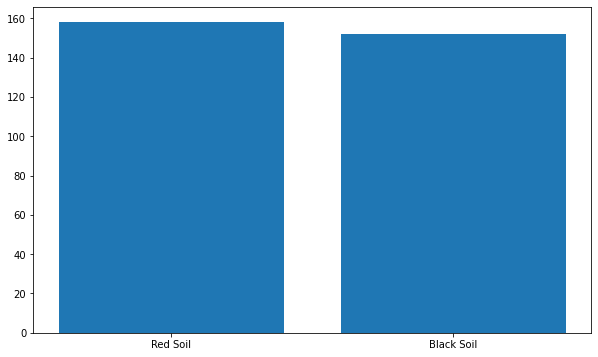

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)
df = df.drop(['SoilType'], axis=1)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Chickpea', 'Pigeonpea', 'Jowar', 'Coriandam', 'Blackgram',
       'Bengalgram', 'Redgram', 'Cotton', 'Paddy', 'JOWAR', 'Paddy,jowar',
       'Fodder Crops', 'Dhanyalu', 'Jonna, Senaga', 'Senaga', 'Pogaku',
       'Mahendra Jonna', 'Merappa ; Senaga', 'Menumu', 'Pacha Jonna',
       'Jonna', 'Vari', 'Sunflower', 'Cottan', 'Ground Nat,Cottan',
       'Oniyan,Ground Nat', 'cotton', 'ground nut',
       'ground nut/groundnut', 'groundnut', 'Cottan,Ground Nat',
       'Grounat', 'Ground Nat', 'Cottan ,Groundnat', 'Cottan,',
       'Groundnut', 'Groundnut,Cottan', 'Ground nut,Cottan',
       'Cottan,Castral', 'GroundNut', 'Castor', 'GroundNut,Cotton',
       'Ground nut', 'Cotton,Vegitable', 'Ground nut,castor',
       'Ground nut ,Mirchi', 'Cotton,Ground Nut', 'Ground Nut',
       'Cotton,castor', 'Ground Nut, Cotton', 'Ground Nut,jowar',
       'Ground Nut ,Cotton', 'Clastor', 'Cotton,Groundnut'], dtype=object)

In [14]:
df['Crop'].value_counts()

Cotton                  83
Groundnut               44
Cottan                  16
Bengalgram              13
Jowar                   11
Senaga                  10
Ground Nut               9
Paddy                    9
Coriandam                8
Jonna                    8
GroundNut                7
Vari                     7
Sunflower                6
Mahendra Jonna           6
Ground Nat               5
Cottan,Ground Nat        5
Dhanyalu                 5
Redgram                  4
cotton                   4
Blackgram                4
ground nut/groundnut     4
Chickpea                 3
Pacha Jonna              2
Cotton,Ground Nut        2
Clastor                  2
Groundnut,Cottan         2
Ground nut,castor        2
Paddy,jowar              2
Ground Nut,jowar         2
JOWAR                    1
Pogaku                   1
Jonna, Senaga            1
Castor                   1
Ground Nut ,Cotton       1
Ground Nat,Cottan        1
Ground nut ,Mirchi       1
ground nut               1
g

GroundNut + Cotton    202
Jowar                  30
BengalGram             25
Coriander              13
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

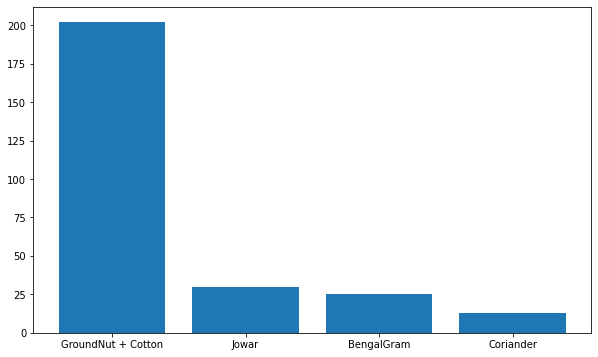

In [15]:
df['Crop'] = df['Crop'].replace('chill', 'Chilli')
df['Crop'] = df['Crop'].replace(['MAZI', 'maize', 'Mazi'], 'Maize')
df['Crop'] = df['Crop'].replace(['Bengalgram', 'Senaga', 'Merappa ; Senaga', 'Erra senaga', 'Jonna, Senaga', 'Jonna/Senaga'], 'BengalGram')
df['Crop'] = df['Crop'].replace(['jowar', 'Jowar', 'JOWAR', 'Jonna', 'Mahendra Jonna', 'Pacha Jonna', 'Erra Jonna', 'Veru senaga, Jonna', 'Jonna+ sunflower', 'Paddy,jowar'],'Jowar')
df['Crop'] = df['Crop'].replace('Vari','BarnyardMillet')
df['Crop'] = df['Crop'].replace(['Dhanyalu', 'Coriandam', 'Dhanyalu , Jonnalu'], 'Coriander')
df['Crop'] = df['Crop'].replace(['Oniyan,Ground Nat', 'ground nut', 'ground nut/groundnut', 'groundnut', 'Grounat', 'Ground Nat', 'Groundnut', 'GroundNut', 'Ground nut', 'Ground nut,castor', 'Ground nut ,Mirchi', 'Ground Nut', 'Ground Nut,jowar'],'GroundNut')
df['Crop'] = df['Crop'].replace(['Cottan', 'cotton', 'Cottan,', 'Cottan,Castral', 'Cotton,Vegitable', 'Cotton,castor'],'Cotton')
df['Crop'] = df['Crop'].replace(['Ground Nat,Cottan', 'Cottan,Ground Nat', 'Cottan ,Groundnat', 'Groundnut,Cottan', 'Ground nut,Cottan', 'GroundNut,Cotton', 'Cotton,Ground Nut', 'Ground Nut, Cotton', 'Ground Nut ,Cotton', 'Cotton,Groundnut', 'Cotton', 'GroundNut'], 'GroundNut + Cotton')
df = df[(df['Crop'] != 'Clastor') & (df['Crop'] != 'Castor') & (df['Crop'] != 'Onian') & (df['Crop'] != 'Korra, Maagu') & (df['Crop'] != 'Menumu') & (df['Crop'] != 'Peasara + Pacha Gaddi')]
df = df[(df['Crop'] != 'Chickpea') & (df['Crop'] != 'Pigeonpea') & (df['Crop'] != 'Blackgram') & (df['Crop'] != 'Redgram') & (df['Crop'] != 'Fodder Crops') & (df['Crop'] != 'Pogaku')]
df = df[(df['Crop'] != 'Sunflower') & (df['Crop'] != 'Paddy') & (df['Crop'] != 'BarnyardMillet')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,0.154581,0.147291,-0.398731,0.350931,0.626788,0.643470,0.075312,-0.127017,0.372085,-0.273208,0.108424,-0.416163,0.110785
EC,0.154581,1.000000,0.047219,-0.090406,0.135849,0.171570,0.157315,0.898074,-0.009813,0.760557,-0.010272,0.054859,-0.048448,0.035307
OC,0.147291,0.047219,1.000000,0.342842,0.606173,0.200203,0.247514,0.026382,0.316863,0.156429,0.104527,0.468411,0.272497,0.043008
P,-0.398731,-0.090406,0.342842,1.000000,0.070703,-0.513249,-0.387599,-0.064982,0.469348,-0.228942,-0.053793,-0.013029,0.173210,-0.052053
K,0.350931,0.135849,0.606173,0.070703,1.000000,0.529954,0.529136,0.076988,0.148299,0.332151,0.263453,0.413098,0.199230,0.068226
Ca,0.626788,0.171570,0.200203,-0.513249,0.529954,1.000000,0.910068,0.137835,-0.179656,0.484463,0.309439,0.389341,0.018532,0.252187
Mg,0.643470,0.157315,0.247514,-0.387599,0.529136,0.910068,1.000000,0.129683,-0.059716,0.529157,0.238333,0.465359,0.034844,0.232972
S,0.075312,0.898074,0.026382,-0.064982,0.076988,0.137835,0.129683,1.000000,0.002336,0.762918,0.001949,0.049728,-0.012802,0.056938
Zn,-0.127017,-0.009813,0.316863,0.469348,0.148299,-0.179656,-0.059716,0.002336,1.000000,0.033656,-0.070543,0.268873,0.211985,0.007383
B,0.372085,0.760557,0.156429,-0.228942,0.332151,0.484463,0.529157,0.762918,0.033656,1.000000,0.077278,0.263906,-0.022490,0.155402


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'B', 'Mn']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['pH', 'EC', 'OC', 'P', 'Zn', 'Fe', 'Cu', 'EVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Zn     Fe    Cu       EVI
1704  8.56  0.34  0.22  4.27  0.38  10.87  1.12  0.219145
1704    Jowar
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, :] = sc1.fit_transform(X[:, :])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7941176470588235


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 73.24 %
Standard Deviation: 3.42 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8088235294117647


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.76 %
Standard Deviation: 5.60 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8382352941176471


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 75.74 %
Standard Deviation: 5.68 %


# XGBoost

In [36]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [37]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [38]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8088235294117647


In [39]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [40]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.69 %
Standard Deviation: 4.95 %


In [41]:
pickle.dump(clf4, open('Kurnool_model.pkl', 'wb'))
pickle.dump(sc1, open('Kurnool_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8415841584158416
Testing Accuracy:  0.7941176470588235


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.67 %
Standard Deviation: 4.79 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.8032832	total: 140ms	remaining: 13.8s
1:	learn: 0.6159905	total: 141ms	remaining: 6.89s
2:	learn: 0.5785842	total: 141ms	remaining: 4.56s
3:	learn: 0.5103710	total: 142ms	remaining: 3.4s
4:	learn: 0.4697676	total: 142ms	remaining: 2.7s
5:	learn: 0.4606049	total: 143ms	remaining: 2.23s
6:	learn: 0.4591998	total: 143ms	remaining: 1.9s
7:	learn: 0.4232135	total: 144ms	remaining: 1.65s
8:	learn: 0.4180282	total: 144ms	remaining: 1.46s
9:	learn: 0.3949562	total: 145ms	remaining: 1.3s
10:	learn: 0.3819876	total: 145ms	remaining: 1.17s
11:	learn: 0.3706831	total: 146ms	remaining: 1.07s
12:	learn: 0.3579066	total: 146ms	remaining: 978ms
13:	learn: 0.3545634	total: 147ms	remaining: 901ms
14:	learn: 0.3478353	total: 147ms	remaining: 834ms
15:	learn: 0.3386691	total: 148ms	remaining: 776ms
16:	learn: 0.3144502	total: 149ms	remaining: 725ms
17:	learn: 0.3131036	total: 149ms	remaining: 681ms
18:	learn: 0.3028152	total: 150ms	remaining: 640ms
19:	learn: 0.2997211	total: 151ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5390378247
bestIteration = 99

Training on fold [1/5]

bestTest = 0.6011443494
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5464033576
bestIteration = 99

Training on fold [3/5]

bestTest = 0.5816677827
bestIteration = 99

Training on fold [4/5]

bestTest = 0.5881361288
bestIteration = 97



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3515726	test: 1.3516907	best: 1.3516907 (0)	total: 1.31ms	remaining: 1.31s
1:	learn: 1.3257465	test: 1.3273720	best: 1.3273720 (1)	total: 2.46ms	remaining: 1.23s
2:	learn: 1.2954135	test: 1.2990046	best: 1.2990046 (2)	total: 3.37ms	remaining: 1.12s
3:	learn: 1.2579662	test: 1.2700014	best: 1.2700014 (3)	total: 4.37ms	remaining: 1.09s
4:	learn: 1.2300375	test: 1.2450188	best: 1.2450188 (4)	total: 5.29ms	remaining: 1.05s
5:	learn: 1.2044412	test: 1.2182366	best: 1.2182366 (5)	total: 6.22ms	remaining: 1.03s
6:	learn: 1.1702660	test: 1.1873231	best: 1.1873231 (6)	total: 7.13ms	remaining: 1.01s
7:	learn: 1.1426651	test: 1.1622086	best: 1.1622086 (7)	total: 8.16ms	remaining: 1.01s
8:	learn: 1.1155047	test: 1.1357373	best: 1.1357373 (8)	total: 9.12ms	remaining: 1s
9:	learn: 1.0913762	test: 1.1141303	best: 1.1141303 (9)	total: 10ms	remaining: 994ms
10:	learn: 1.0679604	test: 1.0935844	best: 1.0935844 (10)	total: 10.9ms	remaining: 983ms
11:	learn: 1.0486775	test: 1.0762205	best: 1.0

167:	learn: 0.3416056	test: 0.5542479	best: 0.5537836 (166)	total: 168ms	remaining: 832ms
168:	learn: 0.3403838	test: 0.5540967	best: 0.5537836 (166)	total: 169ms	remaining: 832ms
169:	learn: 0.3399141	test: 0.5539958	best: 0.5537836 (166)	total: 170ms	remaining: 831ms
170:	learn: 0.3385286	test: 0.5538452	best: 0.5537836 (166)	total: 171ms	remaining: 831ms
171:	learn: 0.3374334	test: 0.5544791	best: 0.5537836 (166)	total: 172ms	remaining: 830ms
172:	learn: 0.3370951	test: 0.5544387	best: 0.5537836 (166)	total: 174ms	remaining: 830ms
173:	learn: 0.3364983	test: 0.5545066	best: 0.5537836 (166)	total: 175ms	remaining: 829ms
174:	learn: 0.3352352	test: 0.5544303	best: 0.5537836 (166)	total: 176ms	remaining: 828ms
175:	learn: 0.3344959	test: 0.5541436	best: 0.5537836 (166)	total: 177ms	remaining: 827ms
176:	learn: 0.3338672	test: 0.5540639	best: 0.5537836 (166)	total: 178ms	remaining: 826ms
177:	learn: 0.3326362	test: 0.5529575	best: 0.5529575 (177)	total: 179ms	remaining: 825ms
178:	learn

337:	learn: 0.2062599	test: 0.5609729	best: 0.5440996 (222)	total: 342ms	remaining: 670ms
338:	learn: 0.2060485	test: 0.5609415	best: 0.5440996 (222)	total: 343ms	remaining: 669ms
339:	learn: 0.2058182	test: 0.5609859	best: 0.5440996 (222)	total: 344ms	remaining: 668ms
340:	learn: 0.2056152	test: 0.5608295	best: 0.5440996 (222)	total: 345ms	remaining: 667ms
341:	learn: 0.2052105	test: 0.5613735	best: 0.5440996 (222)	total: 346ms	remaining: 666ms
342:	learn: 0.2045913	test: 0.5609156	best: 0.5440996 (222)	total: 347ms	remaining: 665ms
343:	learn: 0.2038228	test: 0.5611603	best: 0.5440996 (222)	total: 348ms	remaining: 664ms
344:	learn: 0.2031039	test: 0.5615940	best: 0.5440996 (222)	total: 349ms	remaining: 662ms
345:	learn: 0.2029298	test: 0.5617914	best: 0.5440996 (222)	total: 350ms	remaining: 661ms
346:	learn: 0.2024355	test: 0.5617566	best: 0.5440996 (222)	total: 351ms	remaining: 660ms
347:	learn: 0.2019010	test: 0.5615299	best: 0.5440996 (222)	total: 352ms	remaining: 659ms
348:	learn

508:	learn: 0.1411732	test: 0.5774480	best: 0.5440996 (222)	total: 510ms	remaining: 492ms
509:	learn: 0.1408297	test: 0.5781056	best: 0.5440996 (222)	total: 511ms	remaining: 491ms
510:	learn: 0.1406369	test: 0.5782746	best: 0.5440996 (222)	total: 512ms	remaining: 490ms
511:	learn: 0.1402561	test: 0.5787398	best: 0.5440996 (222)	total: 513ms	remaining: 489ms
512:	learn: 0.1398961	test: 0.5792150	best: 0.5440996 (222)	total: 515ms	remaining: 488ms
513:	learn: 0.1394974	test: 0.5787929	best: 0.5440996 (222)	total: 516ms	remaining: 487ms
514:	learn: 0.1391314	test: 0.5789703	best: 0.5440996 (222)	total: 517ms	remaining: 486ms
515:	learn: 0.1389397	test: 0.5790153	best: 0.5440996 (222)	total: 517ms	remaining: 485ms
516:	learn: 0.1385967	test: 0.5786439	best: 0.5440996 (222)	total: 518ms	remaining: 484ms
517:	learn: 0.1384213	test: 0.5790042	best: 0.5440996 (222)	total: 519ms	remaining: 483ms
518:	learn: 0.1381985	test: 0.5795040	best: 0.5440996 (222)	total: 520ms	remaining: 482ms
519:	learn

684:	learn: 0.1038137	test: 0.5925797	best: 0.5440996 (222)	total: 684ms	remaining: 314ms
685:	learn: 0.1036998	test: 0.5925230	best: 0.5440996 (222)	total: 685ms	remaining: 313ms
686:	learn: 0.1034120	test: 0.5928148	best: 0.5440996 (222)	total: 686ms	remaining: 312ms
687:	learn: 0.1032779	test: 0.5928977	best: 0.5440996 (222)	total: 687ms	remaining: 311ms
688:	learn: 0.1030664	test: 0.5931765	best: 0.5440996 (222)	total: 688ms	remaining: 310ms
689:	learn: 0.1029495	test: 0.5930096	best: 0.5440996 (222)	total: 689ms	remaining: 309ms
690:	learn: 0.1028630	test: 0.5931266	best: 0.5440996 (222)	total: 690ms	remaining: 308ms
691:	learn: 0.1027413	test: 0.5935315	best: 0.5440996 (222)	total: 691ms	remaining: 307ms
692:	learn: 0.1026000	test: 0.5933684	best: 0.5440996 (222)	total: 691ms	remaining: 306ms
693:	learn: 0.1024748	test: 0.5934404	best: 0.5440996 (222)	total: 692ms	remaining: 305ms
694:	learn: 0.1024284	test: 0.5935109	best: 0.5440996 (222)	total: 693ms	remaining: 304ms
695:	learn

851:	learn: 0.0814648	test: 0.6118635	best: 0.5440996 (222)	total: 856ms	remaining: 149ms
852:	learn: 0.0813705	test: 0.6121888	best: 0.5440996 (222)	total: 857ms	remaining: 148ms
853:	learn: 0.0812656	test: 0.6123328	best: 0.5440996 (222)	total: 858ms	remaining: 147ms
854:	learn: 0.0811923	test: 0.6124107	best: 0.5440996 (222)	total: 859ms	remaining: 146ms
855:	learn: 0.0810602	test: 0.6123669	best: 0.5440996 (222)	total: 860ms	remaining: 145ms
856:	learn: 0.0809667	test: 0.6124668	best: 0.5440996 (222)	total: 861ms	remaining: 144ms
857:	learn: 0.0808604	test: 0.6126890	best: 0.5440996 (222)	total: 862ms	remaining: 143ms
858:	learn: 0.0807680	test: 0.6123410	best: 0.5440996 (222)	total: 863ms	remaining: 142ms
859:	learn: 0.0807006	test: 0.6125346	best: 0.5440996 (222)	total: 864ms	remaining: 141ms
860:	learn: 0.0806507	test: 0.6127193	best: 0.5440996 (222)	total: 865ms	remaining: 140ms
861:	learn: 0.0805736	test: 0.6130524	best: 0.5440996 (222)	total: 866ms	remaining: 139ms
862:	learn

7:	learn: 0.8214377	test: 0.8711193	best: 0.8711193 (7)	total: 8.8ms	remaining: 1.09s
8:	learn: 0.7858476	test: 0.8392922	best: 0.8392922 (8)	total: 10.2ms	remaining: 1.12s
9:	learn: 0.7513798	test: 0.8110511	best: 0.8110511 (9)	total: 11.5ms	remaining: 1.14s
10:	learn: 0.7221035	test: 0.7865637	best: 0.7865637 (10)	total: 12.6ms	remaining: 1.13s
11:	learn: 0.6904467	test: 0.7587437	best: 0.7587437 (11)	total: 13.6ms	remaining: 1.12s
12:	learn: 0.6689857	test: 0.7393984	best: 0.7393984 (12)	total: 14.7ms	remaining: 1.11s
13:	learn: 0.6500932	test: 0.7219983	best: 0.7219983 (13)	total: 15.6ms	remaining: 1.1s
14:	learn: 0.6314110	test: 0.7046275	best: 0.7046275 (14)	total: 16.6ms	remaining: 1.09s
15:	learn: 0.6111561	test: 0.6888569	best: 0.6888569 (15)	total: 17.8ms	remaining: 1.09s
16:	learn: 0.5979861	test: 0.6814404	best: 0.6814404 (16)	total: 18.9ms	remaining: 1.09s
17:	learn: 0.5857145	test: 0.6697218	best: 0.6697218 (17)	total: 19.9ms	remaining: 1.08s
18:	learn: 0.5721717	test: 0.

174:	learn: 0.1234935	test: 0.5750538	best: 0.5299215 (67)	total: 180ms	remaining: 847ms
175:	learn: 0.1224181	test: 0.5757379	best: 0.5299215 (67)	total: 181ms	remaining: 846ms
176:	learn: 0.1221914	test: 0.5763455	best: 0.5299215 (67)	total: 182ms	remaining: 845ms
177:	learn: 0.1217328	test: 0.5765058	best: 0.5299215 (67)	total: 183ms	remaining: 845ms
178:	learn: 0.1205152	test: 0.5773300	best: 0.5299215 (67)	total: 184ms	remaining: 843ms
179:	learn: 0.1196471	test: 0.5781427	best: 0.5299215 (67)	total: 185ms	remaining: 842ms
180:	learn: 0.1189194	test: 0.5784759	best: 0.5299215 (67)	total: 186ms	remaining: 841ms
181:	learn: 0.1185037	test: 0.5792854	best: 0.5299215 (67)	total: 187ms	remaining: 839ms
182:	learn: 0.1177842	test: 0.5808271	best: 0.5299215 (67)	total: 188ms	remaining: 838ms
183:	learn: 0.1173743	test: 0.5816964	best: 0.5299215 (67)	total: 189ms	remaining: 836ms
184:	learn: 0.1167969	test: 0.5820507	best: 0.5299215 (67)	total: 190ms	remaining: 835ms
185:	learn: 0.1156759

354:	learn: 0.0562541	test: 0.6397482	best: 0.5299215 (67)	total: 351ms	remaining: 638ms
355:	learn: 0.0558971	test: 0.6394790	best: 0.5299215 (67)	total: 353ms	remaining: 638ms
356:	learn: 0.0556633	test: 0.6405167	best: 0.5299215 (67)	total: 354ms	remaining: 637ms
357:	learn: 0.0555142	test: 0.6407226	best: 0.5299215 (67)	total: 355ms	remaining: 636ms
358:	learn: 0.0553606	test: 0.6417683	best: 0.5299215 (67)	total: 356ms	remaining: 635ms
359:	learn: 0.0550431	test: 0.6411310	best: 0.5299215 (67)	total: 357ms	remaining: 634ms
360:	learn: 0.0549650	test: 0.6418524	best: 0.5299215 (67)	total: 358ms	remaining: 633ms
361:	learn: 0.0547902	test: 0.6422547	best: 0.5299215 (67)	total: 359ms	remaining: 632ms
362:	learn: 0.0546214	test: 0.6422714	best: 0.5299215 (67)	total: 360ms	remaining: 631ms
363:	learn: 0.0545239	test: 0.6424732	best: 0.5299215 (67)	total: 361ms	remaining: 631ms
364:	learn: 0.0543276	test: 0.6430910	best: 0.5299215 (67)	total: 362ms	remaining: 630ms
365:	learn: 0.0541280

528:	learn: 0.0342587	test: 0.6759158	best: 0.5299215 (67)	total: 522ms	remaining: 465ms
529:	learn: 0.0341539	test: 0.6760158	best: 0.5299215 (67)	total: 523ms	remaining: 464ms
530:	learn: 0.0340882	test: 0.6758732	best: 0.5299215 (67)	total: 524ms	remaining: 463ms
531:	learn: 0.0340230	test: 0.6760587	best: 0.5299215 (67)	total: 525ms	remaining: 462ms
532:	learn: 0.0339213	test: 0.6759895	best: 0.5299215 (67)	total: 526ms	remaining: 461ms
533:	learn: 0.0338452	test: 0.6764263	best: 0.5299215 (67)	total: 527ms	remaining: 460ms
534:	learn: 0.0337794	test: 0.6762376	best: 0.5299215 (67)	total: 528ms	remaining: 459ms
535:	learn: 0.0336634	test: 0.6760283	best: 0.5299215 (67)	total: 529ms	remaining: 458ms
536:	learn: 0.0336179	test: 0.6756305	best: 0.5299215 (67)	total: 530ms	remaining: 457ms
537:	learn: 0.0335198	test: 0.6756176	best: 0.5299215 (67)	total: 531ms	remaining: 456ms
538:	learn: 0.0334754	test: 0.6755587	best: 0.5299215 (67)	total: 532ms	remaining: 455ms
539:	learn: 0.0333468

700:	learn: 0.0241848	test: 0.7005986	best: 0.5299215 (67)	total: 693ms	remaining: 296ms
701:	learn: 0.0241229	test: 0.7007591	best: 0.5299215 (67)	total: 694ms	remaining: 295ms
702:	learn: 0.0241031	test: 0.7010319	best: 0.5299215 (67)	total: 695ms	remaining: 294ms
703:	learn: 0.0240534	test: 0.7007445	best: 0.5299215 (67)	total: 696ms	remaining: 293ms
704:	learn: 0.0240136	test: 0.7010193	best: 0.5299215 (67)	total: 697ms	remaining: 292ms
705:	learn: 0.0239811	test: 0.7012748	best: 0.5299215 (67)	total: 698ms	remaining: 291ms
706:	learn: 0.0239386	test: 0.7012733	best: 0.5299215 (67)	total: 699ms	remaining: 290ms
707:	learn: 0.0238735	test: 0.7012893	best: 0.5299215 (67)	total: 700ms	remaining: 289ms
708:	learn: 0.0238389	test: 0.7013794	best: 0.5299215 (67)	total: 701ms	remaining: 288ms
709:	learn: 0.0237862	test: 0.7014428	best: 0.5299215 (67)	total: 702ms	remaining: 287ms
710:	learn: 0.0237324	test: 0.7009770	best: 0.5299215 (67)	total: 703ms	remaining: 286ms
711:	learn: 0.0237106

879:	learn: 0.0183001	test: 0.7277475	best: 0.5299215 (67)	total: 866ms	remaining: 118ms
880:	learn: 0.0182864	test: 0.7279361	best: 0.5299215 (67)	total: 867ms	remaining: 117ms
881:	learn: 0.0182687	test: 0.7279370	best: 0.5299215 (67)	total: 868ms	remaining: 116ms
882:	learn: 0.0182360	test: 0.7282464	best: 0.5299215 (67)	total: 869ms	remaining: 115ms
883:	learn: 0.0182236	test: 0.7282567	best: 0.5299215 (67)	total: 870ms	remaining: 114ms
884:	learn: 0.0182004	test: 0.7283266	best: 0.5299215 (67)	total: 871ms	remaining: 113ms
885:	learn: 0.0181604	test: 0.7288247	best: 0.5299215 (67)	total: 872ms	remaining: 112ms
886:	learn: 0.0181451	test: 0.7288442	best: 0.5299215 (67)	total: 873ms	remaining: 111ms
887:	learn: 0.0181035	test: 0.7291116	best: 0.5299215 (67)	total: 874ms	remaining: 110ms
888:	learn: 0.0180853	test: 0.7293970	best: 0.5299215 (67)	total: 875ms	remaining: 109ms
889:	learn: 0.0180781	test: 0.7294887	best: 0.5299215 (67)	total: 876ms	remaining: 108ms
890:	learn: 0.0180265

15:	learn: 1.0296045	test: 1.0745390	best: 1.0745390 (15)	total: 46.3ms	remaining: 2.85s
16:	learn: 1.0123512	test: 1.0620015	best: 1.0620015 (16)	total: 49ms	remaining: 2.83s
17:	learn: 0.9954313	test: 1.0457734	best: 1.0457734 (17)	total: 51.7ms	remaining: 2.82s
18:	learn: 0.9812431	test: 1.0343100	best: 1.0343100 (18)	total: 54.4ms	remaining: 2.81s
19:	learn: 0.9651343	test: 1.0202517	best: 1.0202517 (19)	total: 57ms	remaining: 2.79s
20:	learn: 0.9468848	test: 1.0043108	best: 1.0043108 (20)	total: 59.5ms	remaining: 2.77s
21:	learn: 0.9337808	test: 0.9942706	best: 0.9942706 (21)	total: 62.1ms	remaining: 2.76s
22:	learn: 0.9198155	test: 0.9839279	best: 0.9839279 (22)	total: 64.7ms	remaining: 2.75s
23:	learn: 0.9096094	test: 0.9734019	best: 0.9734019 (23)	total: 67.3ms	remaining: 2.74s
24:	learn: 0.8953713	test: 0.9599812	best: 0.9599812 (24)	total: 69.9ms	remaining: 2.73s
25:	learn: 0.8829066	test: 0.9498691	best: 0.9498691 (25)	total: 72.3ms	remaining: 2.71s
26:	learn: 0.8723231	test

152:	learn: 0.3360602	test: 0.5762301	best: 0.5762301 (152)	total: 402ms	remaining: 2.23s
153:	learn: 0.3345619	test: 0.5759545	best: 0.5759545 (153)	total: 405ms	remaining: 2.23s
154:	learn: 0.3322741	test: 0.5757711	best: 0.5757711 (154)	total: 408ms	remaining: 2.22s
155:	learn: 0.3310461	test: 0.5757423	best: 0.5757423 (155)	total: 410ms	remaining: 2.22s
156:	learn: 0.3293817	test: 0.5754406	best: 0.5754406 (156)	total: 412ms	remaining: 2.21s
157:	learn: 0.3276734	test: 0.5739114	best: 0.5739114 (157)	total: 415ms	remaining: 2.21s
158:	learn: 0.3261597	test: 0.5733218	best: 0.5733218 (158)	total: 418ms	remaining: 2.21s
159:	learn: 0.3244041	test: 0.5727086	best: 0.5727086 (159)	total: 420ms	remaining: 2.21s
160:	learn: 0.3230905	test: 0.5724191	best: 0.5724191 (160)	total: 423ms	remaining: 2.21s
161:	learn: 0.3218719	test: 0.5723067	best: 0.5723067 (161)	total: 426ms	remaining: 2.2s
162:	learn: 0.3203242	test: 0.5721433	best: 0.5721433 (162)	total: 428ms	remaining: 2.2s
163:	learn: 

296:	learn: 0.1813615	test: 0.5519949	best: 0.5471996 (239)	total: 757ms	remaining: 1.79s
297:	learn: 0.1806508	test: 0.5518274	best: 0.5471996 (239)	total: 759ms	remaining: 1.79s
298:	learn: 0.1800627	test: 0.5514340	best: 0.5471996 (239)	total: 762ms	remaining: 1.79s
299:	learn: 0.1792174	test: 0.5508030	best: 0.5471996 (239)	total: 765ms	remaining: 1.78s
300:	learn: 0.1784511	test: 0.5508020	best: 0.5471996 (239)	total: 767ms	remaining: 1.78s
301:	learn: 0.1777522	test: 0.5507200	best: 0.5471996 (239)	total: 770ms	remaining: 1.78s
302:	learn: 0.1768592	test: 0.5508723	best: 0.5471996 (239)	total: 772ms	remaining: 1.78s
303:	learn: 0.1761937	test: 0.5513501	best: 0.5471996 (239)	total: 775ms	remaining: 1.77s
304:	learn: 0.1754510	test: 0.5511192	best: 0.5471996 (239)	total: 778ms	remaining: 1.77s
305:	learn: 0.1749515	test: 0.5511911	best: 0.5471996 (239)	total: 781ms	remaining: 1.77s
306:	learn: 0.1743262	test: 0.5513220	best: 0.5471996 (239)	total: 784ms	remaining: 1.77s
307:	learn

444:	learn: 0.1128910	test: 0.5607468	best: 0.5471996 (239)	total: 1.12s	remaining: 1.4s
445:	learn: 0.1127169	test: 0.5607870	best: 0.5471996 (239)	total: 1.13s	remaining: 1.4s
446:	learn: 0.1124991	test: 0.5608411	best: 0.5471996 (239)	total: 1.13s	remaining: 1.4s
447:	learn: 0.1122623	test: 0.5608387	best: 0.5471996 (239)	total: 1.13s	remaining: 1.39s
448:	learn: 0.1118168	test: 0.5611324	best: 0.5471996 (239)	total: 1.13s	remaining: 1.39s
449:	learn: 0.1114168	test: 0.5613016	best: 0.5471996 (239)	total: 1.14s	remaining: 1.39s
450:	learn: 0.1110352	test: 0.5609950	best: 0.5471996 (239)	total: 1.14s	remaining: 1.39s
451:	learn: 0.1106809	test: 0.5612987	best: 0.5471996 (239)	total: 1.14s	remaining: 1.39s
452:	learn: 0.1103096	test: 0.5611174	best: 0.5471996 (239)	total: 1.15s	remaining: 1.38s
453:	learn: 0.1101194	test: 0.5612617	best: 0.5471996 (239)	total: 1.15s	remaining: 1.38s
454:	learn: 0.1097830	test: 0.5613207	best: 0.5471996 (239)	total: 1.15s	remaining: 1.38s
455:	learn: 0

582:	learn: 0.0809401	test: 0.5740813	best: 0.5471996 (239)	total: 1.47s	remaining: 1.05s
583:	learn: 0.0807336	test: 0.5740791	best: 0.5471996 (239)	total: 1.47s	remaining: 1.05s
584:	learn: 0.0805202	test: 0.5740343	best: 0.5471996 (239)	total: 1.48s	remaining: 1.05s
585:	learn: 0.0803896	test: 0.5741822	best: 0.5471996 (239)	total: 1.48s	remaining: 1.04s
586:	learn: 0.0801576	test: 0.5740293	best: 0.5471996 (239)	total: 1.48s	remaining: 1.04s
587:	learn: 0.0799508	test: 0.5740628	best: 0.5471996 (239)	total: 1.48s	remaining: 1.04s
588:	learn: 0.0797753	test: 0.5743462	best: 0.5471996 (239)	total: 1.49s	remaining: 1.04s
589:	learn: 0.0795988	test: 0.5745447	best: 0.5471996 (239)	total: 1.49s	remaining: 1.03s
590:	learn: 0.0793988	test: 0.5746678	best: 0.5471996 (239)	total: 1.49s	remaining: 1.03s
591:	learn: 0.0792295	test: 0.5751032	best: 0.5471996 (239)	total: 1.5s	remaining: 1.03s
592:	learn: 0.0790991	test: 0.5751445	best: 0.5471996 (239)	total: 1.5s	remaining: 1.03s
593:	learn: 

725:	learn: 0.0616658	test: 0.5872760	best: 0.5471996 (239)	total: 1.83s	remaining: 691ms
726:	learn: 0.0615623	test: 0.5873696	best: 0.5471996 (239)	total: 1.83s	remaining: 688ms
727:	learn: 0.0614150	test: 0.5874781	best: 0.5471996 (239)	total: 1.84s	remaining: 686ms
728:	learn: 0.0613193	test: 0.5875479	best: 0.5471996 (239)	total: 1.84s	remaining: 683ms
729:	learn: 0.0611590	test: 0.5877243	best: 0.5471996 (239)	total: 1.84s	remaining: 681ms
730:	learn: 0.0610743	test: 0.5876594	best: 0.5471996 (239)	total: 1.84s	remaining: 678ms
731:	learn: 0.0609642	test: 0.5877112	best: 0.5471996 (239)	total: 1.84s	remaining: 676ms
732:	learn: 0.0608474	test: 0.5876011	best: 0.5471996 (239)	total: 1.85s	remaining: 673ms
733:	learn: 0.0607301	test: 0.5876810	best: 0.5471996 (239)	total: 1.85s	remaining: 671ms
734:	learn: 0.0606096	test: 0.5879446	best: 0.5471996 (239)	total: 1.85s	remaining: 669ms
735:	learn: 0.0605151	test: 0.5881014	best: 0.5471996 (239)	total: 1.86s	remaining: 666ms
736:	learn

869:	learn: 0.0490743	test: 0.6003365	best: 0.5471996 (239)	total: 2.18s	remaining: 326ms
870:	learn: 0.0490014	test: 0.6003105	best: 0.5471996 (239)	total: 2.18s	remaining: 323ms
871:	learn: 0.0489252	test: 0.6004166	best: 0.5471996 (239)	total: 2.18s	remaining: 321ms
872:	learn: 0.0488594	test: 0.6005933	best: 0.5471996 (239)	total: 2.19s	remaining: 318ms
873:	learn: 0.0487693	test: 0.6007270	best: 0.5471996 (239)	total: 2.19s	remaining: 316ms
874:	learn: 0.0487085	test: 0.6008288	best: 0.5471996 (239)	total: 2.19s	remaining: 313ms
875:	learn: 0.0486518	test: 0.6008543	best: 0.5471996 (239)	total: 2.19s	remaining: 311ms
876:	learn: 0.0485748	test: 0.6008272	best: 0.5471996 (239)	total: 2.2s	remaining: 308ms
877:	learn: 0.0485187	test: 0.6007339	best: 0.5471996 (239)	total: 2.2s	remaining: 306ms
878:	learn: 0.0484712	test: 0.6007544	best: 0.5471996 (239)	total: 2.2s	remaining: 303ms
879:	learn: 0.0483997	test: 0.6008674	best: 0.5471996 (239)	total: 2.21s	remaining: 301ms
880:	learn: 0

17:	learn: 0.6111942	test: 0.7267404	best: 0.7267404 (17)	total: 43.7ms	remaining: 2.38s
18:	learn: 0.5952340	test: 0.7156772	best: 0.7156772 (18)	total: 46.9ms	remaining: 2.42s
19:	learn: 0.5765310	test: 0.7020865	best: 0.7020865 (19)	total: 49.6ms	remaining: 2.43s
20:	learn: 0.5574960	test: 0.6890167	best: 0.6890167 (20)	total: 52ms	remaining: 2.42s
21:	learn: 0.5448047	test: 0.6827360	best: 0.6827360 (21)	total: 54.5ms	remaining: 2.42s
22:	learn: 0.5319550	test: 0.6777394	best: 0.6777394 (22)	total: 57.2ms	remaining: 2.43s
23:	learn: 0.5212092	test: 0.6705144	best: 0.6705144 (23)	total: 59.9ms	remaining: 2.44s
24:	learn: 0.5101693	test: 0.6623119	best: 0.6623119 (24)	total: 62.5ms	remaining: 2.44s
25:	learn: 0.4984967	test: 0.6590498	best: 0.6590498 (25)	total: 65.5ms	remaining: 2.45s
26:	learn: 0.4896073	test: 0.6533827	best: 0.6533827 (26)	total: 68.8ms	remaining: 2.48s
27:	learn: 0.4794803	test: 0.6450720	best: 0.6450720 (27)	total: 71.3ms	remaining: 2.48s
28:	learn: 0.4684012	te

158:	learn: 0.0925388	test: 0.5700151	best: 0.5547228 (78)	total: 392ms	remaining: 2.08s
159:	learn: 0.0919086	test: 0.5704288	best: 0.5547228 (78)	total: 395ms	remaining: 2.08s
160:	learn: 0.0912159	test: 0.5712338	best: 0.5547228 (78)	total: 398ms	remaining: 2.07s
161:	learn: 0.0904346	test: 0.5717404	best: 0.5547228 (78)	total: 401ms	remaining: 2.07s
162:	learn: 0.0897680	test: 0.5716158	best: 0.5547228 (78)	total: 403ms	remaining: 2.07s
163:	learn: 0.0891564	test: 0.5724620	best: 0.5547228 (78)	total: 406ms	remaining: 2.07s
164:	learn: 0.0882580	test: 0.5727000	best: 0.5547228 (78)	total: 409ms	remaining: 2.07s
165:	learn: 0.0877313	test: 0.5728534	best: 0.5547228 (78)	total: 411ms	remaining: 2.06s
166:	learn: 0.0871096	test: 0.5734361	best: 0.5547228 (78)	total: 414ms	remaining: 2.07s
167:	learn: 0.0862192	test: 0.5738080	best: 0.5547228 (78)	total: 417ms	remaining: 2.06s
168:	learn: 0.0854991	test: 0.5746673	best: 0.5547228 (78)	total: 419ms	remaining: 2.06s
169:	learn: 0.0849704

292:	learn: 0.0430771	test: 0.6106599	best: 0.5547228 (78)	total: 743ms	remaining: 1.79s
293:	learn: 0.0428549	test: 0.6107930	best: 0.5547228 (78)	total: 746ms	remaining: 1.79s
294:	learn: 0.0426520	test: 0.6119927	best: 0.5547228 (78)	total: 748ms	remaining: 1.79s
295:	learn: 0.0424906	test: 0.6120884	best: 0.5547228 (78)	total: 751ms	remaining: 1.78s
296:	learn: 0.0422927	test: 0.6122440	best: 0.5547228 (78)	total: 754ms	remaining: 1.78s
297:	learn: 0.0420780	test: 0.6123011	best: 0.5547228 (78)	total: 756ms	remaining: 1.78s
298:	learn: 0.0419429	test: 0.6121814	best: 0.5547228 (78)	total: 759ms	remaining: 1.78s
299:	learn: 0.0417193	test: 0.6115084	best: 0.5547228 (78)	total: 761ms	remaining: 1.78s
300:	learn: 0.0414843	test: 0.6117117	best: 0.5547228 (78)	total: 765ms	remaining: 1.78s
301:	learn: 0.0412810	test: 0.6114826	best: 0.5547228 (78)	total: 767ms	remaining: 1.77s
302:	learn: 0.0410967	test: 0.6112864	best: 0.5547228 (78)	total: 770ms	remaining: 1.77s
303:	learn: 0.0408957

437:	learn: 0.0262273	test: 0.6366584	best: 0.5547228 (78)	total: 1.1s	remaining: 1.42s
438:	learn: 0.0261337	test: 0.6370597	best: 0.5547228 (78)	total: 1.11s	remaining: 1.41s
439:	learn: 0.0260482	test: 0.6364620	best: 0.5547228 (78)	total: 1.11s	remaining: 1.41s
440:	learn: 0.0259791	test: 0.6365619	best: 0.5547228 (78)	total: 1.11s	remaining: 1.41s
441:	learn: 0.0259079	test: 0.6370230	best: 0.5547228 (78)	total: 1.11s	remaining: 1.41s
442:	learn: 0.0258644	test: 0.6375176	best: 0.5547228 (78)	total: 1.12s	remaining: 1.41s
443:	learn: 0.0257799	test: 0.6377672	best: 0.5547228 (78)	total: 1.12s	remaining: 1.4s
444:	learn: 0.0257079	test: 0.6379416	best: 0.5547228 (78)	total: 1.12s	remaining: 1.4s
445:	learn: 0.0256186	test: 0.6382980	best: 0.5547228 (78)	total: 1.13s	remaining: 1.4s
446:	learn: 0.0255627	test: 0.6386882	best: 0.5547228 (78)	total: 1.13s	remaining: 1.4s
447:	learn: 0.0254848	test: 0.6392389	best: 0.5547228 (78)	total: 1.13s	remaining: 1.4s
448:	learn: 0.0254169	test:

579:	learn: 0.0187057	test: 0.6592298	best: 0.5547228 (78)	total: 1.47s	remaining: 1.06s
580:	learn: 0.0186667	test: 0.6596427	best: 0.5547228 (78)	total: 1.47s	remaining: 1.06s
581:	learn: 0.0186416	test: 0.6597440	best: 0.5547228 (78)	total: 1.47s	remaining: 1.05s
582:	learn: 0.0185986	test: 0.6594335	best: 0.5547228 (78)	total: 1.47s	remaining: 1.05s
583:	learn: 0.0185566	test: 0.6596923	best: 0.5547228 (78)	total: 1.47s	remaining: 1.05s
584:	learn: 0.0185096	test: 0.6598390	best: 0.5547228 (78)	total: 1.48s	remaining: 1.05s
585:	learn: 0.0184634	test: 0.6600062	best: 0.5547228 (78)	total: 1.48s	remaining: 1.04s
586:	learn: 0.0184223	test: 0.6601841	best: 0.5547228 (78)	total: 1.48s	remaining: 1.04s
587:	learn: 0.0183833	test: 0.6601551	best: 0.5547228 (78)	total: 1.48s	remaining: 1.04s
588:	learn: 0.0183415	test: 0.6601706	best: 0.5547228 (78)	total: 1.49s	remaining: 1.04s
589:	learn: 0.0183101	test: 0.6601180	best: 0.5547228 (78)	total: 1.49s	remaining: 1.03s
590:	learn: 0.0182751

718:	learn: 0.0144606	test: 0.6774065	best: 0.5547228 (78)	total: 1.81s	remaining: 708ms
719:	learn: 0.0144343	test: 0.6772614	best: 0.5547228 (78)	total: 1.81s	remaining: 706ms
720:	learn: 0.0144119	test: 0.6774151	best: 0.5547228 (78)	total: 1.82s	remaining: 703ms
721:	learn: 0.0143903	test: 0.6774014	best: 0.5547228 (78)	total: 1.82s	remaining: 701ms
722:	learn: 0.0143717	test: 0.6774511	best: 0.5547228 (78)	total: 1.82s	remaining: 698ms
723:	learn: 0.0143523	test: 0.6776539	best: 0.5547228 (78)	total: 1.82s	remaining: 696ms
724:	learn: 0.0143317	test: 0.6778748	best: 0.5547228 (78)	total: 1.83s	remaining: 693ms
725:	learn: 0.0143127	test: 0.6781592	best: 0.5547228 (78)	total: 1.83s	remaining: 691ms
726:	learn: 0.0142960	test: 0.6783914	best: 0.5547228 (78)	total: 1.83s	remaining: 688ms
727:	learn: 0.0142842	test: 0.6785307	best: 0.5547228 (78)	total: 1.84s	remaining: 686ms
728:	learn: 0.0142686	test: 0.6785511	best: 0.5547228 (78)	total: 1.84s	remaining: 684ms
729:	learn: 0.0142527

864:	learn: 0.0116270	test: 0.6935308	best: 0.5547228 (78)	total: 2.17s	remaining: 339ms
865:	learn: 0.0116119	test: 0.6934677	best: 0.5547228 (78)	total: 2.18s	remaining: 337ms
866:	learn: 0.0115939	test: 0.6934453	best: 0.5547228 (78)	total: 2.18s	remaining: 335ms
867:	learn: 0.0115759	test: 0.6935852	best: 0.5547228 (78)	total: 2.18s	remaining: 332ms
868:	learn: 0.0115573	test: 0.6936746	best: 0.5547228 (78)	total: 2.19s	remaining: 329ms
869:	learn: 0.0115448	test: 0.6940122	best: 0.5547228 (78)	total: 2.19s	remaining: 327ms
870:	learn: 0.0115329	test: 0.6940534	best: 0.5547228 (78)	total: 2.19s	remaining: 325ms
871:	learn: 0.0115219	test: 0.6940859	best: 0.5547228 (78)	total: 2.19s	remaining: 322ms
872:	learn: 0.0115040	test: 0.6941863	best: 0.5547228 (78)	total: 2.2s	remaining: 320ms
873:	learn: 0.0114888	test: 0.6944279	best: 0.5547228 (78)	total: 2.2s	remaining: 317ms
874:	learn: 0.0114771	test: 0.6942714	best: 0.5547228 (78)	total: 2.2s	remaining: 315ms
875:	learn: 0.0114637	te

0:	learn: 1.3639085	test: 1.3643892	best: 1.3643892 (0)	total: 46.9ms	remaining: 46.8s
1:	learn: 1.3465281	test: 1.3539050	best: 1.3539050 (1)	total: 92.7ms	remaining: 46.3s
2:	learn: 1.3275106	test: 1.3410995	best: 1.3410995 (2)	total: 138ms	remaining: 46s
3:	learn: 1.3122661	test: 1.3307683	best: 1.3307683 (3)	total: 187ms	remaining: 46.7s
4:	learn: 1.2914514	test: 1.3129568	best: 1.3129568 (4)	total: 241ms	remaining: 47.9s
5:	learn: 1.2646741	test: 1.2911837	best: 1.2911837 (5)	total: 300ms	remaining: 49.7s
6:	learn: 1.2476333	test: 1.2768999	best: 1.2768999 (6)	total: 355ms	remaining: 50.3s
7:	learn: 1.2317979	test: 1.2652554	best: 1.2652554 (7)	total: 417ms	remaining: 51.8s
8:	learn: 1.2192587	test: 1.2562616	best: 1.2562616 (8)	total: 470ms	remaining: 51.8s
9:	learn: 1.2034793	test: 1.2413212	best: 1.2413212 (9)	total: 529ms	remaining: 52.3s
10:	learn: 1.1859779	test: 1.2298178	best: 1.2298178 (10)	total: 584ms	remaining: 52.5s
11:	learn: 1.1695396	test: 1.2162793	best: 1.2162793

97:	learn: 0.5248803	test: 0.7606279	best: 0.7606279 (97)	total: 5s	remaining: 46s
98:	learn: 0.5218638	test: 0.7589873	best: 0.7589873 (98)	total: 5.05s	remaining: 45.9s
99:	learn: 0.5188400	test: 0.7575585	best: 0.7575585 (99)	total: 5.09s	remaining: 45.8s
100:	learn: 0.5148573	test: 0.7548128	best: 0.7548128 (100)	total: 5.14s	remaining: 45.7s
101:	learn: 0.5106657	test: 0.7515884	best: 0.7515884 (101)	total: 5.2s	remaining: 45.8s
102:	learn: 0.5064143	test: 0.7498703	best: 0.7498703 (102)	total: 5.21s	remaining: 45.4s
103:	learn: 0.5035781	test: 0.7480025	best: 0.7480025 (103)	total: 5.27s	remaining: 45.4s
104:	learn: 0.4988374	test: 0.7445435	best: 0.7445435 (104)	total: 5.29s	remaining: 45.1s
105:	learn: 0.4945812	test: 0.7407705	best: 0.7407705 (105)	total: 5.35s	remaining: 45.1s
106:	learn: 0.4905366	test: 0.7371192	best: 0.7371192 (106)	total: 5.41s	remaining: 45.2s
107:	learn: 0.4863539	test: 0.7343806	best: 0.7343806 (107)	total: 5.44s	remaining: 44.9s
108:	learn: 0.4838826	

192:	learn: 0.2991221	test: 0.6370759	best: 0.6370759 (192)	total: 9.84s	remaining: 41.1s
193:	learn: 0.2978989	test: 0.6367136	best: 0.6367136 (193)	total: 9.89s	remaining: 41.1s
194:	learn: 0.2964485	test: 0.6359110	best: 0.6359110 (194)	total: 9.94s	remaining: 41s
195:	learn: 0.2951322	test: 0.6355437	best: 0.6355437 (195)	total: 9.99s	remaining: 41s
196:	learn: 0.2933281	test: 0.6345553	best: 0.6345553 (196)	total: 10s	remaining: 41s
197:	learn: 0.2918654	test: 0.6337168	best: 0.6337168 (197)	total: 10.1s	remaining: 41s
198:	learn: 0.2903387	test: 0.6324379	best: 0.6324379 (198)	total: 10.2s	remaining: 41s
199:	learn: 0.2891056	test: 0.6322134	best: 0.6322134 (199)	total: 10.2s	remaining: 40.9s
200:	learn: 0.2878769	test: 0.6317147	best: 0.6317147 (200)	total: 10.3s	remaining: 40.9s
201:	learn: 0.2862730	test: 0.6307369	best: 0.6307369 (201)	total: 10.3s	remaining: 40.9s
202:	learn: 0.2845568	test: 0.6300078	best: 0.6300078 (202)	total: 10.4s	remaining: 40.8s
203:	learn: 0.2831391	

287:	learn: 0.1892570	test: 0.5902249	best: 0.5902249 (287)	total: 14.8s	remaining: 36.6s
288:	learn: 0.1885549	test: 0.5900833	best: 0.5900833 (288)	total: 14.8s	remaining: 36.5s
289:	learn: 0.1877660	test: 0.5898286	best: 0.5898286 (289)	total: 14.9s	remaining: 36.5s
290:	learn: 0.1870604	test: 0.5895021	best: 0.5895021 (290)	total: 14.9s	remaining: 36.4s
291:	learn: 0.1860706	test: 0.5886684	best: 0.5886684 (291)	total: 15s	remaining: 36.3s
292:	learn: 0.1851596	test: 0.5883090	best: 0.5883090 (292)	total: 15s	remaining: 36.3s
293:	learn: 0.1837531	test: 0.5863674	best: 0.5863674 (293)	total: 15.1s	remaining: 36.2s
294:	learn: 0.1829514	test: 0.5860393	best: 0.5860393 (294)	total: 15.1s	remaining: 36.1s
295:	learn: 0.1820606	test: 0.5857079	best: 0.5857079 (295)	total: 15.2s	remaining: 36.1s
296:	learn: 0.1812684	test: 0.5856597	best: 0.5856597 (296)	total: 15.2s	remaining: 36s
297:	learn: 0.1804301	test: 0.5855378	best: 0.5855378 (297)	total: 15.3s	remaining: 36s
298:	learn: 0.1798

382:	learn: 0.1314663	test: 0.5686243	best: 0.5686243 (382)	total: 19.7s	remaining: 31.8s
383:	learn: 0.1311136	test: 0.5685490	best: 0.5685490 (383)	total: 19.8s	remaining: 31.8s
384:	learn: 0.1305629	test: 0.5682862	best: 0.5682862 (384)	total: 19.8s	remaining: 31.7s
385:	learn: 0.1300506	test: 0.5685591	best: 0.5682862 (384)	total: 19.9s	remaining: 31.7s
386:	learn: 0.1295490	test: 0.5684894	best: 0.5682862 (384)	total: 19.9s	remaining: 31.6s
387:	learn: 0.1291662	test: 0.5685778	best: 0.5682862 (384)	total: 20s	remaining: 31.5s
388:	learn: 0.1285081	test: 0.5679811	best: 0.5679811 (388)	total: 20s	remaining: 31.5s
389:	learn: 0.1279356	test: 0.5676354	best: 0.5676354 (389)	total: 20.1s	remaining: 31.4s
390:	learn: 0.1275946	test: 0.5675542	best: 0.5675542 (390)	total: 20.1s	remaining: 31.4s
391:	learn: 0.1272568	test: 0.5674842	best: 0.5674842 (391)	total: 20.2s	remaining: 31.3s
392:	learn: 0.1268688	test: 0.5674909	best: 0.5674842 (391)	total: 20.2s	remaining: 31.3s
393:	learn: 0.

476:	learn: 0.0986523	test: 0.5573709	best: 0.5573709 (476)	total: 24.4s	remaining: 26.8s
477:	learn: 0.0983035	test: 0.5571617	best: 0.5571617 (477)	total: 24.5s	remaining: 26.7s
478:	learn: 0.0980614	test: 0.5570353	best: 0.5570353 (478)	total: 24.5s	remaining: 26.7s
479:	learn: 0.0978333	test: 0.5570371	best: 0.5570353 (478)	total: 24.6s	remaining: 26.6s
480:	learn: 0.0975879	test: 0.5567109	best: 0.5567109 (480)	total: 24.6s	remaining: 26.6s
481:	learn: 0.0973417	test: 0.5566378	best: 0.5566378 (481)	total: 24.7s	remaining: 26.5s
482:	learn: 0.0970488	test: 0.5567124	best: 0.5566378 (481)	total: 24.7s	remaining: 26.5s
483:	learn: 0.0968104	test: 0.5567407	best: 0.5566378 (481)	total: 24.8s	remaining: 26.4s
484:	learn: 0.0965455	test: 0.5565766	best: 0.5565766 (484)	total: 24.8s	remaining: 26.4s
485:	learn: 0.0962445	test: 0.5564912	best: 0.5564912 (485)	total: 24.9s	remaining: 26.3s
486:	learn: 0.0960320	test: 0.5564359	best: 0.5564359 (486)	total: 24.9s	remaining: 26.3s
487:	learn

571:	learn: 0.0772932	test: 0.5518529	best: 0.5518106 (570)	total: 29.3s	remaining: 21.9s
572:	learn: 0.0771123	test: 0.5519394	best: 0.5518106 (570)	total: 29.4s	remaining: 21.9s
573:	learn: 0.0769675	test: 0.5519493	best: 0.5518106 (570)	total: 29.4s	remaining: 21.8s
574:	learn: 0.0767570	test: 0.5519059	best: 0.5518106 (570)	total: 29.5s	remaining: 21.8s
575:	learn: 0.0765921	test: 0.5520246	best: 0.5518106 (570)	total: 29.5s	remaining: 21.7s
576:	learn: 0.0764629	test: 0.5519768	best: 0.5518106 (570)	total: 29.6s	remaining: 21.7s
577:	learn: 0.0762994	test: 0.5519533	best: 0.5518106 (570)	total: 29.7s	remaining: 21.6s
578:	learn: 0.0761181	test: 0.5518558	best: 0.5518106 (570)	total: 29.7s	remaining: 21.6s
579:	learn: 0.0759543	test: 0.5518087	best: 0.5518087 (579)	total: 29.8s	remaining: 21.5s
580:	learn: 0.0757630	test: 0.5518977	best: 0.5518087 (579)	total: 29.8s	remaining: 21.5s
581:	learn: 0.0755856	test: 0.5518450	best: 0.5518087 (579)	total: 29.8s	remaining: 21.4s
582:	learn

664:	learn: 0.0630883	test: 0.5489944	best: 0.5489944 (664)	total: 34s	remaining: 17.1s
665:	learn: 0.0629539	test: 0.5489976	best: 0.5489944 (664)	total: 34s	remaining: 17.1s
666:	learn: 0.0628366	test: 0.5490116	best: 0.5489944 (664)	total: 34.1s	remaining: 17s
667:	learn: 0.0627258	test: 0.5489951	best: 0.5489944 (664)	total: 34.2s	remaining: 17s
668:	learn: 0.0625879	test: 0.5490504	best: 0.5489944 (664)	total: 34.2s	remaining: 16.9s
669:	learn: 0.0624906	test: 0.5490727	best: 0.5489944 (664)	total: 34.3s	remaining: 16.9s
670:	learn: 0.0623819	test: 0.5490210	best: 0.5489944 (664)	total: 34.3s	remaining: 16.8s
671:	learn: 0.0622689	test: 0.5490326	best: 0.5489944 (664)	total: 34.4s	remaining: 16.8s
672:	learn: 0.0621724	test: 0.5489934	best: 0.5489934 (672)	total: 34.4s	remaining: 16.7s
673:	learn: 0.0620740	test: 0.5489162	best: 0.5489162 (673)	total: 34.5s	remaining: 16.7s
674:	learn: 0.0619631	test: 0.5489991	best: 0.5489162 (673)	total: 34.5s	remaining: 16.6s
675:	learn: 0.0618

756:	learn: 0.0535242	test: 0.5484790	best: 0.5484353 (755)	total: 38.7s	remaining: 12.4s
757:	learn: 0.0534420	test: 0.5484853	best: 0.5484353 (755)	total: 38.8s	remaining: 12.4s
758:	learn: 0.0533516	test: 0.5485240	best: 0.5484353 (755)	total: 38.8s	remaining: 12.3s
759:	learn: 0.0532555	test: 0.5484103	best: 0.5484103 (759)	total: 38.8s	remaining: 12.3s
760:	learn: 0.0531659	test: 0.5484946	best: 0.5484103 (759)	total: 38.9s	remaining: 12.2s
761:	learn: 0.0530699	test: 0.5483791	best: 0.5483791 (761)	total: 38.9s	remaining: 12.2s
762:	learn: 0.0529833	test: 0.5483357	best: 0.5483357 (762)	total: 39s	remaining: 12.1s
763:	learn: 0.0529151	test: 0.5483566	best: 0.5483357 (762)	total: 39s	remaining: 12.1s
764:	learn: 0.0528494	test: 0.5484107	best: 0.5483357 (762)	total: 39.1s	remaining: 12s
765:	learn: 0.0527565	test: 0.5482752	best: 0.5482752 (765)	total: 39.1s	remaining: 12s
766:	learn: 0.0526675	test: 0.5482932	best: 0.5482752 (765)	total: 39.2s	remaining: 11.9s
767:	learn: 0.0525

848:	learn: 0.0463185	test: 0.5481827	best: 0.5478795 (788)	total: 43.3s	remaining: 7.7s
849:	learn: 0.0462420	test: 0.5482057	best: 0.5478795 (788)	total: 43.4s	remaining: 7.65s
850:	learn: 0.0461855	test: 0.5481849	best: 0.5478795 (788)	total: 43.4s	remaining: 7.6s
851:	learn: 0.0461102	test: 0.5481235	best: 0.5478795 (788)	total: 43.5s	remaining: 7.55s
852:	learn: 0.0460470	test: 0.5480818	best: 0.5478795 (788)	total: 43.5s	remaining: 7.5s
853:	learn: 0.0459160	test: 0.5481742	best: 0.5478795 (788)	total: 43.5s	remaining: 7.45s
854:	learn: 0.0458512	test: 0.5482305	best: 0.5478795 (788)	total: 43.6s	remaining: 7.39s
855:	learn: 0.0457901	test: 0.5482027	best: 0.5478795 (788)	total: 43.7s	remaining: 7.34s
856:	learn: 0.0457175	test: 0.5482544	best: 0.5478795 (788)	total: 43.7s	remaining: 7.29s
857:	learn: 0.0456507	test: 0.5482133	best: 0.5478795 (788)	total: 43.8s	remaining: 7.24s
858:	learn: 0.0455909	test: 0.5481753	best: 0.5478795 (788)	total: 43.8s	remaining: 7.19s
859:	learn: 0

940:	learn: 0.0406319	test: 0.5484819	best: 0.5476844 (899)	total: 48s	remaining: 3.01s
941:	learn: 0.0405806	test: 0.5484392	best: 0.5476844 (899)	total: 48.1s	remaining: 2.96s
942:	learn: 0.0404956	test: 0.5483514	best: 0.5476844 (899)	total: 48.1s	remaining: 2.91s
943:	learn: 0.0404374	test: 0.5483818	best: 0.5476844 (899)	total: 48.2s	remaining: 2.86s
944:	learn: 0.0403766	test: 0.5483909	best: 0.5476844 (899)	total: 48.2s	remaining: 2.81s
945:	learn: 0.0403310	test: 0.5484698	best: 0.5476844 (899)	total: 48.3s	remaining: 2.76s
946:	learn: 0.0402446	test: 0.5484766	best: 0.5476844 (899)	total: 48.3s	remaining: 2.71s
947:	learn: 0.0401665	test: 0.5483778	best: 0.5476844 (899)	total: 48.4s	remaining: 2.65s
948:	learn: 0.0401248	test: 0.5483931	best: 0.5476844 (899)	total: 48.4s	remaining: 2.6s
949:	learn: 0.0400766	test: 0.5484618	best: 0.5476844 (899)	total: 48.5s	remaining: 2.55s
950:	learn: 0.0400307	test: 0.5484666	best: 0.5476844 (899)	total: 48.6s	remaining: 2.5s
951:	learn: 0.

35:	learn: 0.4394696	test: 0.7026197	best: 0.7026197 (35)	total: 1.78s	remaining: 47.7s
36:	learn: 0.4303617	test: 0.6983533	best: 0.6983533 (36)	total: 1.83s	remaining: 47.6s
37:	learn: 0.4226991	test: 0.6945271	best: 0.6945271 (37)	total: 1.88s	remaining: 47.6s
38:	learn: 0.4150695	test: 0.6934313	best: 0.6934313 (38)	total: 1.92s	remaining: 47.4s
39:	learn: 0.4065036	test: 0.6903913	best: 0.6903913 (39)	total: 1.97s	remaining: 47.2s
40:	learn: 0.3980632	test: 0.6843828	best: 0.6843828 (40)	total: 2.02s	remaining: 47.1s
41:	learn: 0.3890280	test: 0.6751455	best: 0.6751455 (41)	total: 2.03s	remaining: 46.3s
42:	learn: 0.3801882	test: 0.6678573	best: 0.6678573 (42)	total: 2.07s	remaining: 46.2s
43:	learn: 0.3743568	test: 0.6659460	best: 0.6659460 (43)	total: 2.13s	remaining: 46.2s
44:	learn: 0.3690110	test: 0.6643632	best: 0.6643632 (44)	total: 2.19s	remaining: 46.4s
45:	learn: 0.3607330	test: 0.6606995	best: 0.6606995 (45)	total: 2.24s	remaining: 46.4s
46:	learn: 0.3538504	test: 0.657

130:	learn: 0.1115542	test: 0.5664711	best: 0.5664711 (130)	total: 6.54s	remaining: 43.4s
131:	learn: 0.1102779	test: 0.5652800	best: 0.5652800 (131)	total: 6.59s	remaining: 43.4s
132:	learn: 0.1091637	test: 0.5654942	best: 0.5652800 (131)	total: 6.64s	remaining: 43.3s
133:	learn: 0.1080008	test: 0.5645192	best: 0.5645192 (133)	total: 6.7s	remaining: 43.3s
134:	learn: 0.1070620	test: 0.5642197	best: 0.5642197 (134)	total: 6.75s	remaining: 43.2s
135:	learn: 0.1059615	test: 0.5640044	best: 0.5640044 (135)	total: 6.79s	remaining: 43.1s
136:	learn: 0.1050998	test: 0.5639409	best: 0.5639409 (136)	total: 6.84s	remaining: 43.1s
137:	learn: 0.1042087	test: 0.5635828	best: 0.5635828 (137)	total: 6.89s	remaining: 43s
138:	learn: 0.1034206	test: 0.5631497	best: 0.5631497 (138)	total: 6.95s	remaining: 43s
139:	learn: 0.1024088	test: 0.5626815	best: 0.5626815 (139)	total: 7s	remaining: 43s
140:	learn: 0.1015214	test: 0.5627355	best: 0.5626815 (139)	total: 7.05s	remaining: 43s
141:	learn: 0.1007437	

225:	learn: 0.0537952	test: 0.5496253	best: 0.5496211 (224)	total: 11.3s	remaining: 38.6s
226:	learn: 0.0534898	test: 0.5495759	best: 0.5495759 (226)	total: 11.3s	remaining: 38.6s
227:	learn: 0.0532161	test: 0.5493273	best: 0.5493273 (227)	total: 11.4s	remaining: 38.6s
228:	learn: 0.0529472	test: 0.5491955	best: 0.5491955 (228)	total: 11.4s	remaining: 38.5s
229:	learn: 0.0526722	test: 0.5489633	best: 0.5489633 (229)	total: 11.5s	remaining: 38.5s
230:	learn: 0.0523854	test: 0.5489623	best: 0.5489623 (230)	total: 11.6s	remaining: 38.5s
231:	learn: 0.0521197	test: 0.5488394	best: 0.5488394 (231)	total: 11.6s	remaining: 38.4s
232:	learn: 0.0518456	test: 0.5490745	best: 0.5488394 (231)	total: 11.7s	remaining: 38.4s
233:	learn: 0.0515707	test: 0.5489121	best: 0.5488394 (231)	total: 11.7s	remaining: 38.3s
234:	learn: 0.0513268	test: 0.5486382	best: 0.5486382 (234)	total: 11.7s	remaining: 38.2s
235:	learn: 0.0510395	test: 0.5488025	best: 0.5486382 (234)	total: 11.8s	remaining: 38.2s
236:	learn

319:	learn: 0.0343270	test: 0.5517618	best: 0.5475455 (262)	total: 16.1s	remaining: 34.2s
320:	learn: 0.0341571	test: 0.5521583	best: 0.5475455 (262)	total: 16.1s	remaining: 34s
321:	learn: 0.0339823	test: 0.5524873	best: 0.5475455 (262)	total: 16.1s	remaining: 33.9s
322:	learn: 0.0338162	test: 0.5522289	best: 0.5475455 (262)	total: 16.2s	remaining: 33.9s
323:	learn: 0.0336757	test: 0.5521122	best: 0.5475455 (262)	total: 16.2s	remaining: 33.8s
324:	learn: 0.0335062	test: 0.5524989	best: 0.5475455 (262)	total: 16.3s	remaining: 33.8s
325:	learn: 0.0333807	test: 0.5524390	best: 0.5475455 (262)	total: 16.3s	remaining: 33.7s
326:	learn: 0.0332211	test: 0.5527594	best: 0.5475455 (262)	total: 16.3s	remaining: 33.6s
327:	learn: 0.0331051	test: 0.5527099	best: 0.5475455 (262)	total: 16.4s	remaining: 33.6s
328:	learn: 0.0329968	test: 0.5525817	best: 0.5475455 (262)	total: 16.4s	remaining: 33.5s
329:	learn: 0.0328788	test: 0.5526648	best: 0.5475455 (262)	total: 16.5s	remaining: 33.5s
330:	learn: 

413:	learn: 0.0246779	test: 0.5559199	best: 0.5475455 (262)	total: 20.5s	remaining: 29s
414:	learn: 0.0246045	test: 0.5558679	best: 0.5475455 (262)	total: 20.6s	remaining: 29s
415:	learn: 0.0245378	test: 0.5559221	best: 0.5475455 (262)	total: 20.6s	remaining: 28.9s
416:	learn: 0.0244710	test: 0.5558949	best: 0.5475455 (262)	total: 20.6s	remaining: 28.9s
417:	learn: 0.0244022	test: 0.5560221	best: 0.5475455 (262)	total: 20.7s	remaining: 28.8s
418:	learn: 0.0243439	test: 0.5560682	best: 0.5475455 (262)	total: 20.7s	remaining: 28.8s
419:	learn: 0.0242806	test: 0.5559850	best: 0.5475455 (262)	total: 20.8s	remaining: 28.7s
420:	learn: 0.0242091	test: 0.5557955	best: 0.5475455 (262)	total: 20.8s	remaining: 28.6s
421:	learn: 0.0241476	test: 0.5558795	best: 0.5475455 (262)	total: 20.9s	remaining: 28.6s
422:	learn: 0.0240901	test: 0.5559788	best: 0.5475455 (262)	total: 20.9s	remaining: 28.6s
423:	learn: 0.0240309	test: 0.5560600	best: 0.5475455 (262)	total: 21s	remaining: 28.5s
424:	learn: 0.02

505:	learn: 0.0195289	test: 0.5585127	best: 0.5475455 (262)	total: 25.2s	remaining: 24.6s
506:	learn: 0.0194751	test: 0.5582286	best: 0.5475455 (262)	total: 25.3s	remaining: 24.6s
507:	learn: 0.0194323	test: 0.5582133	best: 0.5475455 (262)	total: 25.4s	remaining: 24.6s
508:	learn: 0.0193558	test: 0.5583095	best: 0.5475455 (262)	total: 25.4s	remaining: 24.5s
509:	learn: 0.0193046	test: 0.5584010	best: 0.5475455 (262)	total: 25.4s	remaining: 24.4s
510:	learn: 0.0192469	test: 0.5585004	best: 0.5475455 (262)	total: 25.4s	remaining: 24.3s
511:	learn: 0.0192053	test: 0.5586101	best: 0.5475455 (262)	total: 25.5s	remaining: 24.3s
512:	learn: 0.0191590	test: 0.5586395	best: 0.5475455 (262)	total: 25.5s	remaining: 24.2s
513:	learn: 0.0191110	test: 0.5585786	best: 0.5475455 (262)	total: 25.6s	remaining: 24.2s
514:	learn: 0.0190809	test: 0.5585314	best: 0.5475455 (262)	total: 25.6s	remaining: 24.1s
515:	learn: 0.0190365	test: 0.5586420	best: 0.5475455 (262)	total: 25.7s	remaining: 24.1s
516:	learn

597:	learn: 0.0159478	test: 0.5631801	best: 0.5475455 (262)	total: 29.7s	remaining: 20s
598:	learn: 0.0159224	test: 0.5632710	best: 0.5475455 (262)	total: 29.7s	remaining: 19.9s
599:	learn: 0.0158917	test: 0.5632503	best: 0.5475455 (262)	total: 29.8s	remaining: 19.9s
600:	learn: 0.0158653	test: 0.5632974	best: 0.5475455 (262)	total: 29.9s	remaining: 19.8s
601:	learn: 0.0158332	test: 0.5633402	best: 0.5475455 (262)	total: 29.9s	remaining: 19.8s
602:	learn: 0.0158025	test: 0.5634807	best: 0.5475455 (262)	total: 30s	remaining: 19.7s
603:	learn: 0.0157781	test: 0.5635275	best: 0.5475455 (262)	total: 30s	remaining: 19.7s
604:	learn: 0.0157522	test: 0.5634865	best: 0.5475455 (262)	total: 30.1s	remaining: 19.6s
605:	learn: 0.0157227	test: 0.5634947	best: 0.5475455 (262)	total: 30.1s	remaining: 19.6s
606:	learn: 0.0156858	test: 0.5635555	best: 0.5475455 (262)	total: 30.2s	remaining: 19.5s
607:	learn: 0.0156609	test: 0.5636791	best: 0.5475455 (262)	total: 30.2s	remaining: 19.5s
608:	learn: 0.01

690:	learn: 0.0134601	test: 0.5677899	best: 0.5475455 (262)	total: 34.2s	remaining: 15.3s
691:	learn: 0.0134240	test: 0.5680285	best: 0.5475455 (262)	total: 34.2s	remaining: 15.2s
692:	learn: 0.0134054	test: 0.5680370	best: 0.5475455 (262)	total: 34.3s	remaining: 15.2s
693:	learn: 0.0133872	test: 0.5680296	best: 0.5475455 (262)	total: 34.3s	remaining: 15.1s
694:	learn: 0.0133645	test: 0.5681402	best: 0.5475455 (262)	total: 34.4s	remaining: 15.1s
695:	learn: 0.0133405	test: 0.5680847	best: 0.5475455 (262)	total: 34.5s	remaining: 15s
696:	learn: 0.0133212	test: 0.5680509	best: 0.5475455 (262)	total: 34.5s	remaining: 15s
697:	learn: 0.0133024	test: 0.5680517	best: 0.5475455 (262)	total: 34.6s	remaining: 14.9s
698:	learn: 0.0132733	test: 0.5682555	best: 0.5475455 (262)	total: 34.6s	remaining: 14.9s
699:	learn: 0.0132495	test: 0.5683570	best: 0.5475455 (262)	total: 34.7s	remaining: 14.9s
700:	learn: 0.0132327	test: 0.5684223	best: 0.5475455 (262)	total: 34.7s	remaining: 14.8s
701:	learn: 0.

783:	learn: 0.0116153	test: 0.5718040	best: 0.5475455 (262)	total: 38.7s	remaining: 10.7s
784:	learn: 0.0115949	test: 0.5720055	best: 0.5475455 (262)	total: 38.8s	remaining: 10.6s
785:	learn: 0.0115793	test: 0.5720476	best: 0.5475455 (262)	total: 38.8s	remaining: 10.6s
786:	learn: 0.0115361	test: 0.5722949	best: 0.5475455 (262)	total: 38.8s	remaining: 10.5s
787:	learn: 0.0115214	test: 0.5724079	best: 0.5475455 (262)	total: 38.9s	remaining: 10.5s
788:	learn: 0.0115010	test: 0.5726284	best: 0.5475455 (262)	total: 39s	remaining: 10.4s
789:	learn: 0.0114865	test: 0.5727314	best: 0.5475455 (262)	total: 39s	remaining: 10.4s
790:	learn: 0.0114720	test: 0.5728194	best: 0.5475455 (262)	total: 39.1s	remaining: 10.3s
791:	learn: 0.0114490	test: 0.5729072	best: 0.5475455 (262)	total: 39.1s	remaining: 10.3s
792:	learn: 0.0114332	test: 0.5728852	best: 0.5475455 (262)	total: 39.2s	remaining: 10.2s
793:	learn: 0.0114157	test: 0.5729438	best: 0.5475455 (262)	total: 39.2s	remaining: 10.2s
794:	learn: 0.

876:	learn: 0.0101935	test: 0.5756773	best: 0.5475455 (262)	total: 43.4s	remaining: 6.09s
877:	learn: 0.0101818	test: 0.5757680	best: 0.5475455 (262)	total: 43.5s	remaining: 6.04s
878:	learn: 0.0101676	test: 0.5757353	best: 0.5475455 (262)	total: 43.5s	remaining: 5.99s
879:	learn: 0.0101578	test: 0.5757333	best: 0.5475455 (262)	total: 43.5s	remaining: 5.94s
880:	learn: 0.0101450	test: 0.5756916	best: 0.5475455 (262)	total: 43.6s	remaining: 5.89s
881:	learn: 0.0101288	test: 0.5758191	best: 0.5475455 (262)	total: 43.6s	remaining: 5.84s
882:	learn: 0.0101164	test: 0.5758557	best: 0.5475455 (262)	total: 43.7s	remaining: 5.79s
883:	learn: 0.0100967	test: 0.5759887	best: 0.5475455 (262)	total: 43.8s	remaining: 5.74s
884:	learn: 0.0100855	test: 0.5760190	best: 0.5475455 (262)	total: 43.8s	remaining: 5.69s
885:	learn: 0.0100729	test: 0.5760463	best: 0.5475455 (262)	total: 43.9s	remaining: 5.64s
886:	learn: 0.0100587	test: 0.5760398	best: 0.5475455 (262)	total: 43.9s	remaining: 5.59s
887:	learn

971:	learn: 0.0090558	test: 0.5805317	best: 0.5475455 (262)	total: 48.2s	remaining: 1.39s
972:	learn: 0.0090393	test: 0.5803657	best: 0.5475455 (262)	total: 48.2s	remaining: 1.34s
973:	learn: 0.0090266	test: 0.5805334	best: 0.5475455 (262)	total: 48.2s	remaining: 1.28s
974:	learn: 0.0090142	test: 0.5805551	best: 0.5475455 (262)	total: 48.2s	remaining: 1.24s
975:	learn: 0.0090037	test: 0.5805846	best: 0.5475455 (262)	total: 48.3s	remaining: 1.19s
976:	learn: 0.0089886	test: 0.5806719	best: 0.5475455 (262)	total: 48.3s	remaining: 1.14s
977:	learn: 0.0089793	test: 0.5807286	best: 0.5475455 (262)	total: 48.4s	remaining: 1.09s
978:	learn: 0.0089710	test: 0.5807228	best: 0.5475455 (262)	total: 48.4s	remaining: 1.04s
979:	learn: 0.0089620	test: 0.5806910	best: 0.5475455 (262)	total: 48.5s	remaining: 989ms
980:	learn: 0.0089529	test: 0.5806937	best: 0.5475455 (262)	total: 48.5s	remaining: 940ms
981:	learn: 0.0089435	test: 0.5806959	best: 0.5475455 (262)	total: 48.6s	remaining: 890ms
982:	learn

208:	learn: 0.1101955	test: 0.4653930	best: 0.4650530 (191)	total: 170ms	remaining: 644ms
209:	learn: 0.1094287	test: 0.4654752	best: 0.4650530 (191)	total: 171ms	remaining: 643ms
210:	learn: 0.1089431	test: 0.4655747	best: 0.4650530 (191)	total: 172ms	remaining: 643ms
211:	learn: 0.1079677	test: 0.4652836	best: 0.4650530 (191)	total: 173ms	remaining: 642ms
212:	learn: 0.1075257	test: 0.4651639	best: 0.4650530 (191)	total: 174ms	remaining: 642ms
213:	learn: 0.1071670	test: 0.4652661	best: 0.4650530 (191)	total: 175ms	remaining: 641ms
214:	learn: 0.1068507	test: 0.4650450	best: 0.4650450 (214)	total: 175ms	remaining: 640ms
215:	learn: 0.1059258	test: 0.4658023	best: 0.4650450 (214)	total: 176ms	remaining: 640ms
216:	learn: 0.1052978	test: 0.4661294	best: 0.4650450 (214)	total: 177ms	remaining: 640ms
217:	learn: 0.1049085	test: 0.4655810	best: 0.4650450 (214)	total: 178ms	remaining: 639ms
218:	learn: 0.1045280	test: 0.4658891	best: 0.4650450 (214)	total: 179ms	remaining: 638ms
219:	learn

420:	learn: 0.0493178	test: 0.4812220	best: 0.4650450 (214)	total: 336ms	remaining: 462ms
421:	learn: 0.0491583	test: 0.4810110	best: 0.4650450 (214)	total: 337ms	remaining: 461ms
422:	learn: 0.0490073	test: 0.4816699	best: 0.4650450 (214)	total: 338ms	remaining: 461ms
423:	learn: 0.0488835	test: 0.4813003	best: 0.4650450 (214)	total: 339ms	remaining: 460ms
424:	learn: 0.0487580	test: 0.4819056	best: 0.4650450 (214)	total: 340ms	remaining: 460ms
425:	learn: 0.0486329	test: 0.4817261	best: 0.4650450 (214)	total: 341ms	remaining: 459ms
426:	learn: 0.0485647	test: 0.4818243	best: 0.4650450 (214)	total: 341ms	remaining: 458ms
427:	learn: 0.0484154	test: 0.4814271	best: 0.4650450 (214)	total: 342ms	remaining: 457ms
428:	learn: 0.0482080	test: 0.4817355	best: 0.4650450 (214)	total: 343ms	remaining: 457ms
429:	learn: 0.0480839	test: 0.4822397	best: 0.4650450 (214)	total: 344ms	remaining: 456ms
430:	learn: 0.0479863	test: 0.4823325	best: 0.4650450 (214)	total: 345ms	remaining: 455ms
431:	learn

633:	learn: 0.0303685	test: 0.4943150	best: 0.4650450 (214)	total: 519ms	remaining: 300ms
634:	learn: 0.0303022	test: 0.4942728	best: 0.4650450 (214)	total: 520ms	remaining: 299ms
635:	learn: 0.0302603	test: 0.4945090	best: 0.4650450 (214)	total: 520ms	remaining: 298ms
636:	learn: 0.0302158	test: 0.4942526	best: 0.4650450 (214)	total: 521ms	remaining: 297ms
637:	learn: 0.0301423	test: 0.4946563	best: 0.4650450 (214)	total: 522ms	remaining: 296ms
638:	learn: 0.0300988	test: 0.4945140	best: 0.4650450 (214)	total: 523ms	remaining: 296ms
639:	learn: 0.0300178	test: 0.4947132	best: 0.4650450 (214)	total: 524ms	remaining: 295ms
640:	learn: 0.0299548	test: 0.4949072	best: 0.4650450 (214)	total: 525ms	remaining: 294ms
641:	learn: 0.0299272	test: 0.4948973	best: 0.4650450 (214)	total: 526ms	remaining: 293ms
642:	learn: 0.0298698	test: 0.4949412	best: 0.4650450 (214)	total: 527ms	remaining: 292ms
643:	learn: 0.0298268	test: 0.4950687	best: 0.4650450 (214)	total: 527ms	remaining: 292ms
644:	learn

836:	learn: 0.0217579	test: 0.5067515	best: 0.4650450 (214)	total: 683ms	remaining: 133ms
837:	learn: 0.0217402	test: 0.5069516	best: 0.4650450 (214)	total: 683ms	remaining: 132ms
838:	learn: 0.0217186	test: 0.5072191	best: 0.4650450 (214)	total: 684ms	remaining: 131ms
839:	learn: 0.0216795	test: 0.5069749	best: 0.4650450 (214)	total: 685ms	remaining: 131ms
840:	learn: 0.0216714	test: 0.5071418	best: 0.4650450 (214)	total: 686ms	remaining: 130ms
841:	learn: 0.0216179	test: 0.5071868	best: 0.4650450 (214)	total: 687ms	remaining: 129ms
842:	learn: 0.0215558	test: 0.5070267	best: 0.4650450 (214)	total: 688ms	remaining: 128ms
843:	learn: 0.0215050	test: 0.5072318	best: 0.4650450 (214)	total: 689ms	remaining: 127ms
844:	learn: 0.0214493	test: 0.5074648	best: 0.4650450 (214)	total: 690ms	remaining: 127ms
845:	learn: 0.0214191	test: 0.5072657	best: 0.4650450 (214)	total: 691ms	remaining: 126ms
846:	learn: 0.0213993	test: 0.5073405	best: 0.4650450 (214)	total: 691ms	remaining: 125ms
847:	learn

33:	learn: 0.4404106	test: 0.5151456	best: 0.5151456 (33)	total: 25.5ms	remaining: 723ms
34:	learn: 0.4348744	test: 0.5114510	best: 0.5114510 (34)	total: 26.3ms	remaining: 726ms
35:	learn: 0.4279324	test: 0.5095508	best: 0.5095508 (35)	total: 27.2ms	remaining: 727ms
36:	learn: 0.4237947	test: 0.5086047	best: 0.5086047 (36)	total: 28ms	remaining: 727ms
37:	learn: 0.4184382	test: 0.5053445	best: 0.5053445 (37)	total: 28.9ms	remaining: 732ms
38:	learn: 0.4121632	test: 0.5016197	best: 0.5016197 (38)	total: 29.8ms	remaining: 734ms
39:	learn: 0.4070915	test: 0.4979817	best: 0.4979817 (39)	total: 30.7ms	remaining: 737ms
40:	learn: 0.4013368	test: 0.4963886	best: 0.4963886 (40)	total: 31.6ms	remaining: 739ms
41:	learn: 0.3964508	test: 0.4939347	best: 0.4939347 (41)	total: 32.4ms	remaining: 739ms
42:	learn: 0.3921124	test: 0.4907847	best: 0.4907847 (42)	total: 33.2ms	remaining: 738ms
43:	learn: 0.3860071	test: 0.4898375	best: 0.4898375 (43)	total: 34ms	remaining: 739ms
44:	learn: 0.3805154	test

209:	learn: 0.1094522	test: 0.4812382	best: 0.4582094 (122)	total: 189ms	remaining: 712ms
210:	learn: 0.1090591	test: 0.4810722	best: 0.4582094 (122)	total: 190ms	remaining: 712ms
211:	learn: 0.1084289	test: 0.4815151	best: 0.4582094 (122)	total: 191ms	remaining: 711ms
212:	learn: 0.1079099	test: 0.4815679	best: 0.4582094 (122)	total: 192ms	remaining: 710ms
213:	learn: 0.1077902	test: 0.4814487	best: 0.4582094 (122)	total: 193ms	remaining: 710ms
214:	learn: 0.1069176	test: 0.4806163	best: 0.4582094 (122)	total: 194ms	remaining: 709ms
215:	learn: 0.1064415	test: 0.4807244	best: 0.4582094 (122)	total: 195ms	remaining: 707ms
216:	learn: 0.1059697	test: 0.4814823	best: 0.4582094 (122)	total: 196ms	remaining: 706ms
217:	learn: 0.1054645	test: 0.4806340	best: 0.4582094 (122)	total: 197ms	remaining: 705ms
218:	learn: 0.1048795	test: 0.4808912	best: 0.4582094 (122)	total: 197ms	remaining: 704ms
219:	learn: 0.1042746	test: 0.4799826	best: 0.4582094 (122)	total: 198ms	remaining: 703ms
220:	learn

408:	learn: 0.0491597	test: 0.5226334	best: 0.4582094 (122)	total: 357ms	remaining: 516ms
409:	learn: 0.0489741	test: 0.5227462	best: 0.4582094 (122)	total: 358ms	remaining: 515ms
410:	learn: 0.0488561	test: 0.5230683	best: 0.4582094 (122)	total: 359ms	remaining: 514ms
411:	learn: 0.0486274	test: 0.5237215	best: 0.4582094 (122)	total: 360ms	remaining: 513ms
412:	learn: 0.0484718	test: 0.5237910	best: 0.4582094 (122)	total: 361ms	remaining: 512ms
413:	learn: 0.0483540	test: 0.5241637	best: 0.4582094 (122)	total: 361ms	remaining: 512ms
414:	learn: 0.0482366	test: 0.5244494	best: 0.4582094 (122)	total: 362ms	remaining: 511ms
415:	learn: 0.0480460	test: 0.5249669	best: 0.4582094 (122)	total: 363ms	remaining: 510ms
416:	learn: 0.0479813	test: 0.5252233	best: 0.4582094 (122)	total: 364ms	remaining: 509ms
417:	learn: 0.0479015	test: 0.5249684	best: 0.4582094 (122)	total: 365ms	remaining: 508ms
418:	learn: 0.0477377	test: 0.5250008	best: 0.4582094 (122)	total: 366ms	remaining: 507ms
419:	learn

626:	learn: 0.0294129	test: 0.5577409	best: 0.4582094 (122)	total: 532ms	remaining: 317ms
627:	learn: 0.0293389	test: 0.5575568	best: 0.4582094 (122)	total: 533ms	remaining: 316ms
628:	learn: 0.0292965	test: 0.5574566	best: 0.4582094 (122)	total: 534ms	remaining: 315ms
629:	learn: 0.0291912	test: 0.5577708	best: 0.4582094 (122)	total: 535ms	remaining: 314ms
630:	learn: 0.0291354	test: 0.5580378	best: 0.4582094 (122)	total: 536ms	remaining: 313ms
631:	learn: 0.0290865	test: 0.5579048	best: 0.4582094 (122)	total: 537ms	remaining: 313ms
632:	learn: 0.0290710	test: 0.5580086	best: 0.4582094 (122)	total: 538ms	remaining: 312ms
633:	learn: 0.0290047	test: 0.5586598	best: 0.4582094 (122)	total: 539ms	remaining: 311ms
634:	learn: 0.0289093	test: 0.5586692	best: 0.4582094 (122)	total: 540ms	remaining: 310ms
635:	learn: 0.0288804	test: 0.5584396	best: 0.4582094 (122)	total: 540ms	remaining: 309ms
636:	learn: 0.0288099	test: 0.5589184	best: 0.4582094 (122)	total: 541ms	remaining: 308ms
637:	learn

833:	learn: 0.0208017	test: 0.5847346	best: 0.4582094 (122)	total: 697ms	remaining: 139ms
834:	learn: 0.0207729	test: 0.5847388	best: 0.4582094 (122)	total: 698ms	remaining: 138ms
835:	learn: 0.0207521	test: 0.5848253	best: 0.4582094 (122)	total: 699ms	remaining: 137ms
836:	learn: 0.0207212	test: 0.5849562	best: 0.4582094 (122)	total: 700ms	remaining: 136ms
837:	learn: 0.0206840	test: 0.5853562	best: 0.4582094 (122)	total: 701ms	remaining: 135ms
838:	learn: 0.0206595	test: 0.5855269	best: 0.4582094 (122)	total: 702ms	remaining: 135ms
839:	learn: 0.0206322	test: 0.5854328	best: 0.4582094 (122)	total: 702ms	remaining: 134ms
840:	learn: 0.0206024	test: 0.5856124	best: 0.4582094 (122)	total: 703ms	remaining: 133ms
841:	learn: 0.0205658	test: 0.5859017	best: 0.4582094 (122)	total: 704ms	remaining: 132ms
842:	learn: 0.0205348	test: 0.5860757	best: 0.4582094 (122)	total: 705ms	remaining: 131ms
843:	learn: 0.0204980	test: 0.5861139	best: 0.4582094 (122)	total: 706ms	remaining: 130ms
844:	learn

28:	learn: 0.4474838	test: 0.5844102	best: 0.5844102 (28)	total: 21.9ms	remaining: 733ms
29:	learn: 0.4366557	test: 0.5795208	best: 0.5795208 (29)	total: 22.8ms	remaining: 736ms
30:	learn: 0.4306356	test: 0.5762360	best: 0.5762360 (30)	total: 23.6ms	remaining: 737ms
31:	learn: 0.4236624	test: 0.5719966	best: 0.5719966 (31)	total: 24.4ms	remaining: 738ms
32:	learn: 0.4177129	test: 0.5678995	best: 0.5678995 (32)	total: 25.4ms	remaining: 745ms
33:	learn: 0.4125595	test: 0.5647928	best: 0.5647928 (33)	total: 26.4ms	remaining: 749ms
34:	learn: 0.4066584	test: 0.5620813	best: 0.5620813 (34)	total: 27.2ms	remaining: 751ms
35:	learn: 0.4000465	test: 0.5621332	best: 0.5620813 (34)	total: 28.1ms	remaining: 752ms
36:	learn: 0.3928490	test: 0.5558483	best: 0.5558483 (36)	total: 28.8ms	remaining: 751ms
37:	learn: 0.3896442	test: 0.5526143	best: 0.5526143 (37)	total: 29.6ms	remaining: 750ms
38:	learn: 0.3845949	test: 0.5480894	best: 0.5480894 (38)	total: 30.5ms	remaining: 752ms
39:	learn: 0.3775010	

254:	learn: 0.0742289	test: 0.5301829	best: 0.4955913 (100)	total: 199ms	remaining: 580ms
255:	learn: 0.0740590	test: 0.5300936	best: 0.4955913 (100)	total: 199ms	remaining: 580ms
256:	learn: 0.0737170	test: 0.5309179	best: 0.4955913 (100)	total: 200ms	remaining: 579ms
257:	learn: 0.0732952	test: 0.5302732	best: 0.4955913 (100)	total: 201ms	remaining: 579ms
258:	learn: 0.0730137	test: 0.5302277	best: 0.4955913 (100)	total: 202ms	remaining: 578ms
259:	learn: 0.0727983	test: 0.5303954	best: 0.4955913 (100)	total: 203ms	remaining: 578ms
260:	learn: 0.0724439	test: 0.5303065	best: 0.4955913 (100)	total: 204ms	remaining: 578ms
261:	learn: 0.0722366	test: 0.5302956	best: 0.4955913 (100)	total: 205ms	remaining: 577ms
262:	learn: 0.0716889	test: 0.5308391	best: 0.4955913 (100)	total: 206ms	remaining: 576ms
263:	learn: 0.0712827	test: 0.5309573	best: 0.4955913 (100)	total: 206ms	remaining: 575ms
264:	learn: 0.0708798	test: 0.5306171	best: 0.4955913 (100)	total: 207ms	remaining: 575ms
265:	learn

465:	learn: 0.0363549	test: 0.5617711	best: 0.4955913 (100)	total: 365ms	remaining: 418ms
466:	learn: 0.0362997	test: 0.5619981	best: 0.4955913 (100)	total: 366ms	remaining: 417ms
467:	learn: 0.0361510	test: 0.5619019	best: 0.4955913 (100)	total: 366ms	remaining: 416ms
468:	learn: 0.0360393	test: 0.5622079	best: 0.4955913 (100)	total: 367ms	remaining: 416ms
469:	learn: 0.0359353	test: 0.5623916	best: 0.4955913 (100)	total: 368ms	remaining: 415ms
470:	learn: 0.0357868	test: 0.5622303	best: 0.4955913 (100)	total: 369ms	remaining: 415ms
471:	learn: 0.0357277	test: 0.5626358	best: 0.4955913 (100)	total: 370ms	remaining: 414ms
472:	learn: 0.0356591	test: 0.5625282	best: 0.4955913 (100)	total: 371ms	remaining: 413ms
473:	learn: 0.0355354	test: 0.5628057	best: 0.4955913 (100)	total: 372ms	remaining: 412ms
474:	learn: 0.0354986	test: 0.5629435	best: 0.4955913 (100)	total: 372ms	remaining: 412ms
475:	learn: 0.0354098	test: 0.5629680	best: 0.4955913 (100)	total: 373ms	remaining: 411ms
476:	learn

675:	learn: 0.0232564	test: 0.5889372	best: 0.4955913 (100)	total: 529ms	remaining: 254ms
676:	learn: 0.0231974	test: 0.5889638	best: 0.4955913 (100)	total: 530ms	remaining: 253ms
677:	learn: 0.0231599	test: 0.5891898	best: 0.4955913 (100)	total: 531ms	remaining: 252ms
678:	learn: 0.0231173	test: 0.5890508	best: 0.4955913 (100)	total: 532ms	remaining: 251ms
679:	learn: 0.0230707	test: 0.5891659	best: 0.4955913 (100)	total: 533ms	remaining: 251ms
680:	learn: 0.0230196	test: 0.5895576	best: 0.4955913 (100)	total: 534ms	remaining: 250ms
681:	learn: 0.0229720	test: 0.5896265	best: 0.4955913 (100)	total: 534ms	remaining: 249ms
682:	learn: 0.0229163	test: 0.5895613	best: 0.4955913 (100)	total: 535ms	remaining: 248ms
683:	learn: 0.0228987	test: 0.5896002	best: 0.4955913 (100)	total: 536ms	remaining: 248ms
684:	learn: 0.0228357	test: 0.5897999	best: 0.4955913 (100)	total: 537ms	remaining: 247ms
685:	learn: 0.0227774	test: 0.5900595	best: 0.4955913 (100)	total: 538ms	remaining: 246ms
686:	learn

893:	learn: 0.0163910	test: 0.6111613	best: 0.4955913 (100)	total: 705ms	remaining: 83.6ms
894:	learn: 0.0163513	test: 0.6110853	best: 0.4955913 (100)	total: 706ms	remaining: 82.8ms
895:	learn: 0.0163328	test: 0.6110714	best: 0.4955913 (100)	total: 707ms	remaining: 82ms
896:	learn: 0.0163054	test: 0.6111596	best: 0.4955913 (100)	total: 708ms	remaining: 81.3ms
897:	learn: 0.0162765	test: 0.6110764	best: 0.4955913 (100)	total: 709ms	remaining: 80.5ms
898:	learn: 0.0162537	test: 0.6110302	best: 0.4955913 (100)	total: 710ms	remaining: 79.7ms
899:	learn: 0.0162371	test: 0.6110553	best: 0.4955913 (100)	total: 710ms	remaining: 78.9ms
900:	learn: 0.0162210	test: 0.6111082	best: 0.4955913 (100)	total: 711ms	remaining: 78.2ms
901:	learn: 0.0162097	test: 0.6112273	best: 0.4955913 (100)	total: 712ms	remaining: 77.4ms
902:	learn: 0.0161857	test: 0.6112361	best: 0.4955913 (100)	total: 713ms	remaining: 76.6ms
903:	learn: 0.0161627	test: 0.6113902	best: 0.4955913 (100)	total: 714ms	remaining: 75.8ms
9

0:	learn: 1.2611796	total: 945us	remaining: 945ms
1:	learn: 1.1641810	total: 1.84ms	remaining: 918ms
2:	learn: 1.0731822	total: 2.63ms	remaining: 875ms
3:	learn: 1.0155349	total: 3.42ms	remaining: 852ms
4:	learn: 0.9541989	total: 4.29ms	remaining: 854ms
5:	learn: 0.8996632	total: 5.1ms	remaining: 845ms
6:	learn: 0.8612361	total: 5.9ms	remaining: 837ms
7:	learn: 0.8253516	total: 6.72ms	remaining: 833ms
8:	learn: 0.7871971	total: 7.51ms	remaining: 827ms
9:	learn: 0.7600236	total: 8.35ms	remaining: 827ms
10:	learn: 0.7371524	total: 9.16ms	remaining: 824ms
11:	learn: 0.7113426	total: 9.96ms	remaining: 820ms
12:	learn: 0.6910102	total: 10.8ms	remaining: 819ms
13:	learn: 0.6706682	total: 11.7ms	remaining: 821ms
14:	learn: 0.6531784	total: 12.5ms	remaining: 820ms
15:	learn: 0.6336835	total: 13.3ms	remaining: 821ms
16:	learn: 0.6173052	total: 14.2ms	remaining: 822ms
17:	learn: 0.6016008	total: 15.1ms	remaining: 824ms
18:	learn: 0.5873650	total: 16ms	remaining: 825ms
19:	learn: 0.5736902	total:

164:	learn: 0.1619463	total: 157ms	remaining: 797ms
165:	learn: 0.1609908	total: 159ms	remaining: 797ms
166:	learn: 0.1605519	total: 160ms	remaining: 797ms
167:	learn: 0.1597615	total: 161ms	remaining: 797ms
168:	learn: 0.1592036	total: 162ms	remaining: 796ms
169:	learn: 0.1586483	total: 163ms	remaining: 796ms
170:	learn: 0.1581714	total: 164ms	remaining: 796ms
171:	learn: 0.1570796	total: 165ms	remaining: 796ms
172:	learn: 0.1564037	total: 166ms	remaining: 796ms
173:	learn: 0.1552212	total: 167ms	remaining: 795ms
174:	learn: 0.1541348	total: 169ms	remaining: 795ms
175:	learn: 0.1527257	total: 170ms	remaining: 794ms
176:	learn: 0.1516103	total: 171ms	remaining: 794ms
177:	learn: 0.1509922	total: 172ms	remaining: 794ms
178:	learn: 0.1501265	total: 173ms	remaining: 794ms
179:	learn: 0.1494705	total: 174ms	remaining: 793ms
180:	learn: 0.1489640	total: 175ms	remaining: 794ms
181:	learn: 0.1483793	total: 177ms	remaining: 794ms
182:	learn: 0.1475205	total: 178ms	remaining: 793ms
183:	learn: 

324:	learn: 0.0776761	total: 315ms	remaining: 654ms
325:	learn: 0.0774374	total: 316ms	remaining: 653ms
326:	learn: 0.0772315	total: 317ms	remaining: 653ms
327:	learn: 0.0768557	total: 318ms	remaining: 652ms
328:	learn: 0.0766611	total: 319ms	remaining: 651ms
329:	learn: 0.0765614	total: 320ms	remaining: 651ms
330:	learn: 0.0763049	total: 321ms	remaining: 650ms
331:	learn: 0.0760074	total: 323ms	remaining: 649ms
332:	learn: 0.0757585	total: 324ms	remaining: 648ms
333:	learn: 0.0753775	total: 325ms	remaining: 648ms
334:	learn: 0.0750008	total: 326ms	remaining: 647ms
335:	learn: 0.0746207	total: 327ms	remaining: 647ms
336:	learn: 0.0741312	total: 328ms	remaining: 646ms
337:	learn: 0.0739577	total: 329ms	remaining: 645ms
338:	learn: 0.0738867	total: 331ms	remaining: 645ms
339:	learn: 0.0735410	total: 332ms	remaining: 644ms
340:	learn: 0.0733710	total: 333ms	remaining: 644ms
341:	learn: 0.0731679	total: 334ms	remaining: 643ms
342:	learn: 0.0730527	total: 336ms	remaining: 643ms
343:	learn: 

482:	learn: 0.0485929	total: 470ms	remaining: 503ms
483:	learn: 0.0484455	total: 471ms	remaining: 502ms
484:	learn: 0.0483359	total: 472ms	remaining: 502ms
485:	learn: 0.0482164	total: 474ms	remaining: 501ms
486:	learn: 0.0480507	total: 475ms	remaining: 500ms
487:	learn: 0.0480153	total: 476ms	remaining: 499ms
488:	learn: 0.0479323	total: 477ms	remaining: 499ms
489:	learn: 0.0477827	total: 478ms	remaining: 498ms
490:	learn: 0.0476541	total: 479ms	remaining: 497ms
491:	learn: 0.0475328	total: 480ms	remaining: 496ms
492:	learn: 0.0475110	total: 482ms	remaining: 495ms
493:	learn: 0.0474824	total: 483ms	remaining: 494ms
494:	learn: 0.0474245	total: 484ms	remaining: 494ms
495:	learn: 0.0473484	total: 485ms	remaining: 493ms
496:	learn: 0.0472011	total: 486ms	remaining: 492ms
497:	learn: 0.0471513	total: 487ms	remaining: 491ms
498:	learn: 0.0470588	total: 489ms	remaining: 491ms
499:	learn: 0.0468966	total: 490ms	remaining: 490ms
500:	learn: 0.0468175	total: 491ms	remaining: 489ms
501:	learn: 

653:	learn: 0.0337219	total: 639ms	remaining: 338ms
654:	learn: 0.0336649	total: 640ms	remaining: 337ms
655:	learn: 0.0335854	total: 641ms	remaining: 336ms
656:	learn: 0.0335255	total: 642ms	remaining: 335ms
657:	learn: 0.0334422	total: 643ms	remaining: 334ms
658:	learn: 0.0333441	total: 644ms	remaining: 333ms
659:	learn: 0.0332878	total: 646ms	remaining: 333ms
660:	learn: 0.0332161	total: 647ms	remaining: 332ms
661:	learn: 0.0331213	total: 648ms	remaining: 331ms
662:	learn: 0.0330901	total: 649ms	remaining: 330ms
663:	learn: 0.0330486	total: 650ms	remaining: 329ms
664:	learn: 0.0329782	total: 651ms	remaining: 328ms
665:	learn: 0.0328650	total: 652ms	remaining: 327ms
666:	learn: 0.0327792	total: 654ms	remaining: 326ms
667:	learn: 0.0326816	total: 655ms	remaining: 325ms
668:	learn: 0.0326369	total: 656ms	remaining: 324ms
669:	learn: 0.0326000	total: 657ms	remaining: 324ms
670:	learn: 0.0325287	total: 658ms	remaining: 323ms
671:	learn: 0.0324783	total: 659ms	remaining: 322ms
672:	learn: 

811:	learn: 0.0256578	total: 796ms	remaining: 184ms
812:	learn: 0.0256194	total: 797ms	remaining: 183ms
813:	learn: 0.0256006	total: 798ms	remaining: 182ms
814:	learn: 0.0255351	total: 799ms	remaining: 181ms
815:	learn: 0.0254561	total: 800ms	remaining: 180ms
816:	learn: 0.0254174	total: 801ms	remaining: 179ms
817:	learn: 0.0253970	total: 802ms	remaining: 178ms
818:	learn: 0.0253687	total: 803ms	remaining: 177ms
819:	learn: 0.0253353	total: 804ms	remaining: 177ms
820:	learn: 0.0252928	total: 805ms	remaining: 176ms
821:	learn: 0.0252203	total: 806ms	remaining: 175ms
822:	learn: 0.0251943	total: 807ms	remaining: 174ms
823:	learn: 0.0251520	total: 808ms	remaining: 173ms
824:	learn: 0.0250890	total: 809ms	remaining: 172ms
825:	learn: 0.0250301	total: 810ms	remaining: 171ms
826:	learn: 0.0250026	total: 811ms	remaining: 170ms
827:	learn: 0.0249800	total: 812ms	remaining: 169ms
828:	learn: 0.0249218	total: 814ms	remaining: 168ms
829:	learn: 0.0248903	total: 815ms	remaining: 167ms
830:	learn: 

970:	learn: 0.0207032	total: 951ms	remaining: 28.4ms
971:	learn: 0.0206684	total: 952ms	remaining: 27.4ms
972:	learn: 0.0206510	total: 953ms	remaining: 26.4ms
973:	learn: 0.0206329	total: 954ms	remaining: 25.5ms
974:	learn: 0.0206231	total: 955ms	remaining: 24.5ms
975:	learn: 0.0205892	total: 956ms	remaining: 23.5ms
976:	learn: 0.0205717	total: 957ms	remaining: 22.5ms
977:	learn: 0.0205451	total: 959ms	remaining: 21.6ms
978:	learn: 0.0205273	total: 960ms	remaining: 20.6ms
979:	learn: 0.0204950	total: 961ms	remaining: 19.6ms
980:	learn: 0.0204730	total: 962ms	remaining: 18.6ms
981:	learn: 0.0204250	total: 963ms	remaining: 17.7ms
982:	learn: 0.0203999	total: 964ms	remaining: 16.7ms
983:	learn: 0.0203785	total: 965ms	remaining: 15.7ms
984:	learn: 0.0203661	total: 966ms	remaining: 14.7ms
985:	learn: 0.0203376	total: 967ms	remaining: 13.7ms
986:	learn: 0.0202958	total: 969ms	remaining: 12.8ms
987:	learn: 0.0202685	total: 970ms	remaining: 11.8ms
988:	learn: 0.0202387	total: 971ms	remaining: 

278:	learn: 0.0867291	total: 266ms	remaining: 688ms
279:	learn: 0.0862530	total: 267ms	remaining: 688ms
280:	learn: 0.0859614	total: 268ms	remaining: 687ms
281:	learn: 0.0856932	total: 270ms	remaining: 687ms
282:	learn: 0.0854127	total: 271ms	remaining: 686ms
283:	learn: 0.0851367	total: 272ms	remaining: 686ms
284:	learn: 0.0849376	total: 273ms	remaining: 685ms
285:	learn: 0.0845376	total: 274ms	remaining: 684ms
286:	learn: 0.0843754	total: 275ms	remaining: 684ms
287:	learn: 0.0838412	total: 276ms	remaining: 683ms
288:	learn: 0.0835463	total: 277ms	remaining: 682ms
289:	learn: 0.0832703	total: 278ms	remaining: 681ms
290:	learn: 0.0830309	total: 279ms	remaining: 681ms
291:	learn: 0.0828708	total: 280ms	remaining: 680ms
292:	learn: 0.0825681	total: 281ms	remaining: 679ms
293:	learn: 0.0823477	total: 282ms	remaining: 678ms
294:	learn: 0.0819674	total: 283ms	remaining: 677ms
295:	learn: 0.0816669	total: 284ms	remaining: 676ms
296:	learn: 0.0813054	total: 286ms	remaining: 676ms
297:	learn: 

438:	learn: 0.0519070	total: 422ms	remaining: 540ms
439:	learn: 0.0517570	total: 424ms	remaining: 539ms
440:	learn: 0.0516078	total: 425ms	remaining: 538ms
441:	learn: 0.0514478	total: 426ms	remaining: 538ms
442:	learn: 0.0512939	total: 427ms	remaining: 537ms
443:	learn: 0.0511286	total: 428ms	remaining: 536ms
444:	learn: 0.0509268	total: 429ms	remaining: 535ms
445:	learn: 0.0508105	total: 430ms	remaining: 534ms
446:	learn: 0.0506565	total: 431ms	remaining: 534ms
447:	learn: 0.0505370	total: 432ms	remaining: 533ms
448:	learn: 0.0504565	total: 434ms	remaining: 532ms
449:	learn: 0.0502956	total: 435ms	remaining: 532ms
450:	learn: 0.0501958	total: 436ms	remaining: 531ms
451:	learn: 0.0501743	total: 437ms	remaining: 530ms
452:	learn: 0.0500310	total: 438ms	remaining: 529ms
453:	learn: 0.0499671	total: 439ms	remaining: 528ms
454:	learn: 0.0498669	total: 440ms	remaining: 527ms
455:	learn: 0.0497502	total: 442ms	remaining: 527ms
456:	learn: 0.0496594	total: 443ms	remaining: 526ms
457:	learn: 

752:	learn: 0.0270880	total: 733ms	remaining: 240ms
753:	learn: 0.0270404	total: 734ms	remaining: 240ms
754:	learn: 0.0269844	total: 735ms	remaining: 239ms
755:	learn: 0.0269506	total: 737ms	remaining: 238ms
756:	learn: 0.0268593	total: 738ms	remaining: 237ms
757:	learn: 0.0268278	total: 739ms	remaining: 236ms
758:	learn: 0.0268146	total: 740ms	remaining: 235ms
759:	learn: 0.0267715	total: 741ms	remaining: 234ms
760:	learn: 0.0267195	total: 742ms	remaining: 233ms
761:	learn: 0.0266640	total: 743ms	remaining: 232ms
762:	learn: 0.0266263	total: 744ms	remaining: 231ms
763:	learn: 0.0265809	total: 746ms	remaining: 230ms
764:	learn: 0.0265465	total: 747ms	remaining: 229ms
765:	learn: 0.0265114	total: 748ms	remaining: 228ms
766:	learn: 0.0264596	total: 749ms	remaining: 228ms
767:	learn: 0.0263929	total: 750ms	remaining: 227ms
768:	learn: 0.0263643	total: 751ms	remaining: 226ms
769:	learn: 0.0262993	total: 752ms	remaining: 225ms
770:	learn: 0.0262572	total: 754ms	remaining: 224ms
771:	learn: 

923:	learn: 0.0213351	total: 901ms	remaining: 74.1ms
924:	learn: 0.0213044	total: 902ms	remaining: 73.2ms
925:	learn: 0.0212884	total: 904ms	remaining: 72.2ms
926:	learn: 0.0212533	total: 905ms	remaining: 71.3ms
927:	learn: 0.0212225	total: 906ms	remaining: 70.3ms
928:	learn: 0.0212099	total: 907ms	remaining: 69.3ms
929:	learn: 0.0211611	total: 908ms	remaining: 68.3ms
930:	learn: 0.0211353	total: 909ms	remaining: 67.4ms
931:	learn: 0.0211183	total: 910ms	remaining: 66.4ms
932:	learn: 0.0210933	total: 911ms	remaining: 65.4ms
933:	learn: 0.0210632	total: 912ms	remaining: 64.5ms
934:	learn: 0.0210353	total: 913ms	remaining: 63.5ms
935:	learn: 0.0210016	total: 914ms	remaining: 62.5ms
936:	learn: 0.0209807	total: 915ms	remaining: 61.5ms
937:	learn: 0.0209433	total: 916ms	remaining: 60.6ms
938:	learn: 0.0209102	total: 917ms	remaining: 59.6ms
939:	learn: 0.0208804	total: 918ms	remaining: 58.6ms
940:	learn: 0.0208407	total: 919ms	remaining: 57.6ms
941:	learn: 0.0208080	total: 920ms	remaining: 

215:	learn: 0.1159536	total: 206ms	remaining: 749ms
216:	learn: 0.1153305	total: 207ms	remaining: 749ms
217:	learn: 0.1148675	total: 209ms	remaining: 748ms
218:	learn: 0.1144447	total: 210ms	remaining: 748ms
219:	learn: 0.1142100	total: 211ms	remaining: 749ms
220:	learn: 0.1133432	total: 212ms	remaining: 748ms
221:	learn: 0.1126347	total: 213ms	remaining: 748ms
222:	learn: 0.1117712	total: 214ms	remaining: 747ms
223:	learn: 0.1111920	total: 216ms	remaining: 747ms
224:	learn: 0.1110589	total: 217ms	remaining: 746ms
225:	learn: 0.1105971	total: 218ms	remaining: 748ms
226:	learn: 0.1104583	total: 219ms	remaining: 747ms
227:	learn: 0.1098730	total: 221ms	remaining: 747ms
228:	learn: 0.1093513	total: 222ms	remaining: 746ms
229:	learn: 0.1086985	total: 223ms	remaining: 747ms
230:	learn: 0.1080572	total: 224ms	remaining: 746ms
231:	learn: 0.1075431	total: 225ms	remaining: 746ms
232:	learn: 0.1072928	total: 227ms	remaining: 746ms
233:	learn: 0.1067553	total: 228ms	remaining: 745ms
234:	learn: 

530:	learn: 0.0400755	total: 533ms	remaining: 471ms
531:	learn: 0.0400087	total: 534ms	remaining: 470ms
532:	learn: 0.0399307	total: 536ms	remaining: 469ms
533:	learn: 0.0398530	total: 537ms	remaining: 468ms
534:	learn: 0.0397605	total: 538ms	remaining: 467ms
535:	learn: 0.0396179	total: 539ms	remaining: 466ms
536:	learn: 0.0395130	total: 540ms	remaining: 466ms
537:	learn: 0.0394509	total: 541ms	remaining: 465ms
538:	learn: 0.0393684	total: 542ms	remaining: 464ms
539:	learn: 0.0393305	total: 543ms	remaining: 463ms
540:	learn: 0.0392251	total: 545ms	remaining: 462ms
541:	learn: 0.0391227	total: 546ms	remaining: 461ms
542:	learn: 0.0390371	total: 547ms	remaining: 460ms
543:	learn: 0.0388079	total: 548ms	remaining: 459ms
544:	learn: 0.0387513	total: 549ms	remaining: 458ms
545:	learn: 0.0386568	total: 550ms	remaining: 458ms
546:	learn: 0.0385394	total: 551ms	remaining: 457ms
547:	learn: 0.0384262	total: 552ms	remaining: 456ms
548:	learn: 0.0383668	total: 553ms	remaining: 455ms
549:	learn: 

849:	learn: 0.0225998	total: 845ms	remaining: 149ms
850:	learn: 0.0225691	total: 846ms	remaining: 148ms
851:	learn: 0.0225445	total: 847ms	remaining: 147ms
852:	learn: 0.0225140	total: 848ms	remaining: 146ms
853:	learn: 0.0224735	total: 850ms	remaining: 145ms
854:	learn: 0.0224634	total: 851ms	remaining: 144ms
855:	learn: 0.0224277	total: 852ms	remaining: 143ms
856:	learn: 0.0223732	total: 853ms	remaining: 142ms
857:	learn: 0.0223488	total: 854ms	remaining: 141ms
858:	learn: 0.0223297	total: 855ms	remaining: 140ms
859:	learn: 0.0223150	total: 856ms	remaining: 139ms
860:	learn: 0.0222968	total: 857ms	remaining: 138ms
861:	learn: 0.0222534	total: 858ms	remaining: 137ms
862:	learn: 0.0222045	total: 859ms	remaining: 136ms
863:	learn: 0.0221684	total: 860ms	remaining: 135ms
864:	learn: 0.0221312	total: 862ms	remaining: 134ms
865:	learn: 0.0221147	total: 863ms	remaining: 134ms
866:	learn: 0.0220956	total: 864ms	remaining: 133ms
867:	learn: 0.0220608	total: 865ms	remaining: 132ms
868:	learn: 

173:	learn: 0.1377499	total: 165ms	remaining: 784ms
174:	learn: 0.1364370	total: 166ms	remaining: 784ms
175:	learn: 0.1357922	total: 167ms	remaining: 783ms
176:	learn: 0.1343205	total: 168ms	remaining: 783ms
177:	learn: 0.1332518	total: 169ms	remaining: 783ms
178:	learn: 0.1327164	total: 171ms	remaining: 783ms
179:	learn: 0.1316537	total: 172ms	remaining: 783ms
180:	learn: 0.1309808	total: 173ms	remaining: 782ms
181:	learn: 0.1305258	total: 174ms	remaining: 782ms
182:	learn: 0.1298896	total: 175ms	remaining: 782ms
183:	learn: 0.1293794	total: 176ms	remaining: 781ms
184:	learn: 0.1285587	total: 177ms	remaining: 781ms
185:	learn: 0.1276321	total: 178ms	remaining: 781ms
186:	learn: 0.1268376	total: 180ms	remaining: 780ms
187:	learn: 0.1259905	total: 181ms	remaining: 781ms
188:	learn: 0.1253654	total: 182ms	remaining: 781ms
189:	learn: 0.1243951	total: 183ms	remaining: 780ms
190:	learn: 0.1237692	total: 184ms	remaining: 780ms
191:	learn: 0.1226490	total: 185ms	remaining: 780ms
192:	learn: 

490:	learn: 0.0447408	total: 478ms	remaining: 495ms
491:	learn: 0.0446125	total: 479ms	remaining: 494ms
492:	learn: 0.0444787	total: 480ms	remaining: 494ms
493:	learn: 0.0444104	total: 481ms	remaining: 493ms
494:	learn: 0.0443200	total: 482ms	remaining: 492ms
495:	learn: 0.0442348	total: 483ms	remaining: 491ms
496:	learn: 0.0441709	total: 485ms	remaining: 490ms
497:	learn: 0.0441142	total: 486ms	remaining: 490ms
498:	learn: 0.0439840	total: 487ms	remaining: 489ms
499:	learn: 0.0439117	total: 488ms	remaining: 488ms
500:	learn: 0.0438536	total: 489ms	remaining: 487ms
501:	learn: 0.0437251	total: 490ms	remaining: 486ms
502:	learn: 0.0435575	total: 491ms	remaining: 485ms
503:	learn: 0.0434477	total: 492ms	remaining: 484ms
504:	learn: 0.0433497	total: 493ms	remaining: 484ms
505:	learn: 0.0432624	total: 495ms	remaining: 483ms
506:	learn: 0.0431864	total: 496ms	remaining: 482ms
507:	learn: 0.0431424	total: 497ms	remaining: 481ms
508:	learn: 0.0430819	total: 498ms	remaining: 481ms
509:	learn: 

821:	learn: 0.0241797	total: 804ms	remaining: 174ms
822:	learn: 0.0241194	total: 805ms	remaining: 173ms
823:	learn: 0.0240794	total: 806ms	remaining: 172ms
824:	learn: 0.0240618	total: 807ms	remaining: 171ms
825:	learn: 0.0240055	total: 808ms	remaining: 170ms
826:	learn: 0.0239578	total: 810ms	remaining: 169ms
827:	learn: 0.0239261	total: 811ms	remaining: 168ms
828:	learn: 0.0238915	total: 812ms	remaining: 167ms
829:	learn: 0.0238635	total: 813ms	remaining: 166ms
830:	learn: 0.0237977	total: 814ms	remaining: 166ms
831:	learn: 0.0237487	total: 815ms	remaining: 165ms
832:	learn: 0.0237144	total: 816ms	remaining: 164ms
833:	learn: 0.0236802	total: 817ms	remaining: 163ms
834:	learn: 0.0236330	total: 818ms	remaining: 162ms
835:	learn: 0.0236061	total: 820ms	remaining: 161ms
836:	learn: 0.0235635	total: 821ms	remaining: 160ms
837:	learn: 0.0235311	total: 822ms	remaining: 159ms
838:	learn: 0.0234769	total: 823ms	remaining: 158ms
839:	learn: 0.0234651	total: 824ms	remaining: 157ms
840:	learn: 

978:	learn: 0.0191022	total: 958ms	remaining: 20.5ms
979:	learn: 0.0190839	total: 959ms	remaining: 19.6ms
980:	learn: 0.0190735	total: 960ms	remaining: 18.6ms
981:	learn: 0.0190497	total: 961ms	remaining: 17.6ms
982:	learn: 0.0190182	total: 962ms	remaining: 16.6ms
983:	learn: 0.0189845	total: 963ms	remaining: 15.7ms
984:	learn: 0.0189605	total: 964ms	remaining: 14.7ms
985:	learn: 0.0189546	total: 965ms	remaining: 13.7ms
986:	learn: 0.0189341	total: 966ms	remaining: 12.7ms
987:	learn: 0.0189185	total: 967ms	remaining: 11.7ms
988:	learn: 0.0189099	total: 968ms	remaining: 10.8ms
989:	learn: 0.0188792	total: 969ms	remaining: 9.79ms
990:	learn: 0.0188474	total: 970ms	remaining: 8.81ms
991:	learn: 0.0188209	total: 971ms	remaining: 7.83ms
992:	learn: 0.0187882	total: 972ms	remaining: 6.85ms
993:	learn: 0.0187687	total: 973ms	remaining: 5.87ms
994:	learn: 0.0187464	total: 974ms	remaining: 4.89ms
995:	learn: 0.0187155	total: 975ms	remaining: 3.92ms
996:	learn: 0.0186810	total: 976ms	remaining: 

270:	learn: 0.0889667	total: 264ms	remaining: 710ms
271:	learn: 0.0885461	total: 265ms	remaining: 709ms
272:	learn: 0.0882213	total: 266ms	remaining: 708ms
273:	learn: 0.0877822	total: 267ms	remaining: 708ms
274:	learn: 0.0874017	total: 268ms	remaining: 707ms
275:	learn: 0.0867941	total: 269ms	remaining: 706ms
276:	learn: 0.0866861	total: 270ms	remaining: 705ms
277:	learn: 0.0864967	total: 271ms	remaining: 704ms
278:	learn: 0.0860578	total: 272ms	remaining: 703ms
279:	learn: 0.0858295	total: 273ms	remaining: 702ms
280:	learn: 0.0855168	total: 274ms	remaining: 701ms
281:	learn: 0.0851473	total: 275ms	remaining: 700ms
282:	learn: 0.0849213	total: 276ms	remaining: 699ms
283:	learn: 0.0845689	total: 277ms	remaining: 698ms
284:	learn: 0.0842483	total: 278ms	remaining: 698ms
285:	learn: 0.0841144	total: 279ms	remaining: 696ms
286:	learn: 0.0836103	total: 280ms	remaining: 695ms
287:	learn: 0.0834993	total: 281ms	remaining: 694ms
288:	learn: 0.0832486	total: 282ms	remaining: 694ms
289:	learn: 

444:	learn: 0.0494594	total: 434ms	remaining: 541ms
445:	learn: 0.0492480	total: 435ms	remaining: 540ms
446:	learn: 0.0491614	total: 436ms	remaining: 540ms
447:	learn: 0.0489943	total: 437ms	remaining: 539ms
448:	learn: 0.0488283	total: 439ms	remaining: 538ms
449:	learn: 0.0487233	total: 440ms	remaining: 537ms
450:	learn: 0.0485737	total: 441ms	remaining: 536ms
451:	learn: 0.0484202	total: 442ms	remaining: 536ms
452:	learn: 0.0483036	total: 443ms	remaining: 535ms
453:	learn: 0.0482081	total: 444ms	remaining: 534ms
454:	learn: 0.0480613	total: 445ms	remaining: 533ms
455:	learn: 0.0479861	total: 446ms	remaining: 533ms
456:	learn: 0.0477573	total: 447ms	remaining: 532ms
457:	learn: 0.0476336	total: 449ms	remaining: 531ms
458:	learn: 0.0474645	total: 450ms	remaining: 530ms
459:	learn: 0.0473326	total: 451ms	remaining: 530ms
460:	learn: 0.0471432	total: 452ms	remaining: 529ms
461:	learn: 0.0470796	total: 453ms	remaining: 528ms
462:	learn: 0.0469523	total: 455ms	remaining: 527ms
463:	learn: 

603:	learn: 0.0344759	total: 591ms	remaining: 387ms
604:	learn: 0.0343990	total: 592ms	remaining: 386ms
605:	learn: 0.0342918	total: 593ms	remaining: 385ms
606:	learn: 0.0342258	total: 594ms	remaining: 385ms
607:	learn: 0.0341492	total: 595ms	remaining: 384ms
608:	learn: 0.0340646	total: 596ms	remaining: 383ms
609:	learn: 0.0339920	total: 598ms	remaining: 382ms
610:	learn: 0.0339394	total: 599ms	remaining: 381ms
611:	learn: 0.0339160	total: 600ms	remaining: 380ms
612:	learn: 0.0337901	total: 601ms	remaining: 379ms
613:	learn: 0.0337186	total: 602ms	remaining: 378ms
614:	learn: 0.0336838	total: 603ms	remaining: 377ms
615:	learn: 0.0336447	total: 604ms	remaining: 376ms
616:	learn: 0.0335560	total: 605ms	remaining: 376ms
617:	learn: 0.0334872	total: 606ms	remaining: 375ms
618:	learn: 0.0333867	total: 607ms	remaining: 374ms
619:	learn: 0.0333023	total: 609ms	remaining: 373ms
620:	learn: 0.0332507	total: 610ms	remaining: 372ms
621:	learn: 0.0332081	total: 611ms	remaining: 371ms
622:	learn: 

761:	learn: 0.0259157	total: 746ms	remaining: 233ms
762:	learn: 0.0258821	total: 747ms	remaining: 232ms
763:	learn: 0.0258378	total: 749ms	remaining: 231ms
764:	learn: 0.0257691	total: 750ms	remaining: 230ms
765:	learn: 0.0257191	total: 751ms	remaining: 229ms
766:	learn: 0.0256766	total: 752ms	remaining: 228ms
767:	learn: 0.0256376	total: 753ms	remaining: 227ms
768:	learn: 0.0255993	total: 754ms	remaining: 227ms
769:	learn: 0.0255654	total: 755ms	remaining: 226ms
770:	learn: 0.0255297	total: 756ms	remaining: 225ms
771:	learn: 0.0255089	total: 757ms	remaining: 224ms
772:	learn: 0.0254779	total: 759ms	remaining: 223ms
773:	learn: 0.0254429	total: 760ms	remaining: 222ms
774:	learn: 0.0254303	total: 761ms	remaining: 221ms
775:	learn: 0.0254025	total: 762ms	remaining: 220ms
776:	learn: 0.0253742	total: 763ms	remaining: 219ms
777:	learn: 0.0253415	total: 764ms	remaining: 218ms
778:	learn: 0.0252784	total: 765ms	remaining: 217ms
779:	learn: 0.0252035	total: 766ms	remaining: 216ms
780:	learn: 

919:	learn: 0.0205303	total: 902ms	remaining: 78.4ms
920:	learn: 0.0205081	total: 903ms	remaining: 77.5ms
921:	learn: 0.0204835	total: 904ms	remaining: 76.5ms
922:	learn: 0.0204669	total: 905ms	remaining: 75.5ms
923:	learn: 0.0204349	total: 906ms	remaining: 74.6ms
924:	learn: 0.0204106	total: 907ms	remaining: 73.6ms
925:	learn: 0.0203909	total: 909ms	remaining: 72.6ms
926:	learn: 0.0203666	total: 910ms	remaining: 71.6ms
927:	learn: 0.0203550	total: 911ms	remaining: 70.7ms
928:	learn: 0.0203317	total: 912ms	remaining: 69.7ms
929:	learn: 0.0203114	total: 913ms	remaining: 68.7ms
930:	learn: 0.0202914	total: 914ms	remaining: 67.8ms
931:	learn: 0.0202526	total: 916ms	remaining: 66.8ms
932:	learn: 0.0202119	total: 917ms	remaining: 65.8ms
933:	learn: 0.0201777	total: 918ms	remaining: 64.9ms
934:	learn: 0.0201335	total: 919ms	remaining: 63.9ms
935:	learn: 0.0200984	total: 920ms	remaining: 62.9ms
936:	learn: 0.0200767	total: 921ms	remaining: 61.9ms
937:	learn: 0.0200325	total: 922ms	remaining: 

225:	learn: 0.1094450	total: 216ms	remaining: 740ms
226:	learn: 0.1089399	total: 217ms	remaining: 739ms
227:	learn: 0.1083522	total: 218ms	remaining: 739ms
228:	learn: 0.1082131	total: 219ms	remaining: 739ms
229:	learn: 0.1077867	total: 221ms	remaining: 738ms
230:	learn: 0.1070178	total: 221ms	remaining: 737ms
231:	learn: 0.1064517	total: 222ms	remaining: 736ms
232:	learn: 0.1062051	total: 223ms	remaining: 735ms
233:	learn: 0.1056547	total: 224ms	remaining: 734ms
234:	learn: 0.1052437	total: 225ms	remaining: 734ms
235:	learn: 0.1045113	total: 227ms	remaining: 734ms
236:	learn: 0.1043042	total: 228ms	remaining: 733ms
237:	learn: 0.1037971	total: 229ms	remaining: 733ms
238:	learn: 0.1035469	total: 230ms	remaining: 732ms
239:	learn: 0.1030572	total: 231ms	remaining: 731ms
240:	learn: 0.1026023	total: 232ms	remaining: 730ms
241:	learn: 0.1019477	total: 233ms	remaining: 730ms
242:	learn: 0.1011464	total: 234ms	remaining: 730ms
243:	learn: 0.1008411	total: 236ms	remaining: 730ms
244:	learn: 

384:	learn: 0.0589817	total: 372ms	remaining: 595ms
385:	learn: 0.0588276	total: 373ms	remaining: 594ms
386:	learn: 0.0587261	total: 374ms	remaining: 593ms
387:	learn: 0.0585046	total: 376ms	remaining: 592ms
388:	learn: 0.0584727	total: 377ms	remaining: 592ms
389:	learn: 0.0582047	total: 378ms	remaining: 591ms
390:	learn: 0.0578820	total: 379ms	remaining: 590ms
391:	learn: 0.0576608	total: 380ms	remaining: 590ms
392:	learn: 0.0573441	total: 381ms	remaining: 589ms
393:	learn: 0.0571906	total: 382ms	remaining: 588ms
394:	learn: 0.0569373	total: 384ms	remaining: 588ms
395:	learn: 0.0567613	total: 385ms	remaining: 587ms
396:	learn: 0.0566559	total: 386ms	remaining: 586ms
397:	learn: 0.0564891	total: 387ms	remaining: 586ms
398:	learn: 0.0562191	total: 388ms	remaining: 585ms
399:	learn: 0.0560586	total: 390ms	remaining: 584ms
400:	learn: 0.0558424	total: 391ms	remaining: 584ms
401:	learn: 0.0556124	total: 392ms	remaining: 583ms
402:	learn: 0.0554715	total: 393ms	remaining: 582ms
403:	learn: 

542:	learn: 0.0383657	total: 528ms	remaining: 445ms
543:	learn: 0.0382555	total: 529ms	remaining: 444ms
544:	learn: 0.0382193	total: 530ms	remaining: 443ms
545:	learn: 0.0380719	total: 532ms	remaining: 442ms
546:	learn: 0.0379537	total: 533ms	remaining: 441ms
547:	learn: 0.0378655	total: 534ms	remaining: 440ms
548:	learn: 0.0377658	total: 535ms	remaining: 440ms
549:	learn: 0.0377138	total: 536ms	remaining: 439ms
550:	learn: 0.0375895	total: 537ms	remaining: 438ms
551:	learn: 0.0374853	total: 538ms	remaining: 437ms
552:	learn: 0.0373540	total: 540ms	remaining: 436ms
553:	learn: 0.0372857	total: 541ms	remaining: 435ms
554:	learn: 0.0371670	total: 542ms	remaining: 435ms
555:	learn: 0.0371464	total: 543ms	remaining: 434ms
556:	learn: 0.0370450	total: 544ms	remaining: 433ms
557:	learn: 0.0369288	total: 545ms	remaining: 432ms
558:	learn: 0.0368250	total: 546ms	remaining: 431ms
559:	learn: 0.0367654	total: 548ms	remaining: 430ms
560:	learn: 0.0366140	total: 549ms	remaining: 429ms
561:	learn: 

715:	learn: 0.0270404	total: 697ms	remaining: 277ms
716:	learn: 0.0270319	total: 698ms	remaining: 276ms
717:	learn: 0.0269716	total: 700ms	remaining: 275ms
718:	learn: 0.0269131	total: 701ms	remaining: 274ms
719:	learn: 0.0268792	total: 702ms	remaining: 273ms
720:	learn: 0.0268488	total: 703ms	remaining: 272ms
721:	learn: 0.0268069	total: 704ms	remaining: 271ms
722:	learn: 0.0267444	total: 705ms	remaining: 270ms
723:	learn: 0.0267212	total: 706ms	remaining: 269ms
724:	learn: 0.0266716	total: 707ms	remaining: 268ms
725:	learn: 0.0266389	total: 708ms	remaining: 267ms
726:	learn: 0.0265868	total: 709ms	remaining: 266ms
727:	learn: 0.0265462	total: 711ms	remaining: 265ms
728:	learn: 0.0264401	total: 711ms	remaining: 264ms
729:	learn: 0.0264234	total: 712ms	remaining: 264ms
730:	learn: 0.0263503	total: 713ms	remaining: 263ms
731:	learn: 0.0263037	total: 714ms	remaining: 262ms
732:	learn: 0.0262620	total: 715ms	remaining: 261ms
733:	learn: 0.0262346	total: 716ms	remaining: 260ms
734:	learn: 

876:	learn: 0.0211538	total: 854ms	remaining: 120ms
877:	learn: 0.0210989	total: 855ms	remaining: 119ms
878:	learn: 0.0210504	total: 856ms	remaining: 118ms
879:	learn: 0.0210113	total: 857ms	remaining: 117ms
880:	learn: 0.0209744	total: 859ms	remaining: 116ms
881:	learn: 0.0209451	total: 860ms	remaining: 115ms
882:	learn: 0.0208932	total: 861ms	remaining: 114ms
883:	learn: 0.0208585	total: 862ms	remaining: 113ms
884:	learn: 0.0208328	total: 863ms	remaining: 112ms
885:	learn: 0.0208098	total: 864ms	remaining: 111ms
886:	learn: 0.0207957	total: 865ms	remaining: 110ms
887:	learn: 0.0207624	total: 867ms	remaining: 109ms
888:	learn: 0.0207234	total: 868ms	remaining: 108ms
889:	learn: 0.0207037	total: 869ms	remaining: 107ms
890:	learn: 0.0206762	total: 870ms	remaining: 106ms
891:	learn: 0.0206367	total: 871ms	remaining: 105ms
892:	learn: 0.0205957	total: 872ms	remaining: 105ms
893:	learn: 0.0205696	total: 873ms	remaining: 104ms
894:	learn: 0.0205632	total: 875ms	remaining: 103ms
895:	learn: 

160:	learn: 0.1616926	total: 153ms	remaining: 799ms
161:	learn: 0.1614376	total: 154ms	remaining: 799ms
162:	learn: 0.1600972	total: 156ms	remaining: 799ms
163:	learn: 0.1590735	total: 157ms	remaining: 799ms
164:	learn: 0.1579865	total: 158ms	remaining: 799ms
165:	learn: 0.1565679	total: 159ms	remaining: 798ms
166:	learn: 0.1550571	total: 160ms	remaining: 798ms
167:	learn: 0.1538328	total: 161ms	remaining: 797ms
168:	learn: 0.1529085	total: 162ms	remaining: 796ms
169:	learn: 0.1515000	total: 163ms	remaining: 796ms
170:	learn: 0.1508541	total: 164ms	remaining: 795ms
171:	learn: 0.1502562	total: 165ms	remaining: 794ms
172:	learn: 0.1492250	total: 166ms	remaining: 794ms
173:	learn: 0.1484311	total: 167ms	remaining: 793ms
174:	learn: 0.1478212	total: 168ms	remaining: 792ms
175:	learn: 0.1472976	total: 169ms	remaining: 792ms
176:	learn: 0.1466017	total: 170ms	remaining: 791ms
177:	learn: 0.1457024	total: 171ms	remaining: 791ms
178:	learn: 0.1449379	total: 172ms	remaining: 790ms
179:	learn: 

324:	learn: 0.0782931	total: 322ms	remaining: 669ms
325:	learn: 0.0779647	total: 323ms	remaining: 669ms
326:	learn: 0.0777013	total: 325ms	remaining: 668ms
327:	learn: 0.0776384	total: 326ms	remaining: 668ms
328:	learn: 0.0774092	total: 327ms	remaining: 667ms
329:	learn: 0.0770770	total: 329ms	remaining: 667ms
330:	learn: 0.0766450	total: 330ms	remaining: 667ms
331:	learn: 0.0763349	total: 331ms	remaining: 666ms
332:	learn: 0.0759107	total: 332ms	remaining: 666ms
333:	learn: 0.0756371	total: 334ms	remaining: 665ms
334:	learn: 0.0753061	total: 335ms	remaining: 664ms
335:	learn: 0.0750936	total: 336ms	remaining: 664ms
336:	learn: 0.0748538	total: 337ms	remaining: 664ms
337:	learn: 0.0744236	total: 339ms	remaining: 663ms
338:	learn: 0.0742663	total: 340ms	remaining: 663ms
339:	learn: 0.0742059	total: 341ms	remaining: 663ms
340:	learn: 0.0739211	total: 343ms	remaining: 662ms
341:	learn: 0.0736381	total: 344ms	remaining: 662ms
342:	learn: 0.0734059	total: 345ms	remaining: 661ms
343:	learn: 

636:	learn: 0.0341294	total: 633ms	remaining: 360ms
637:	learn: 0.0340228	total: 634ms	remaining: 360ms
638:	learn: 0.0339520	total: 635ms	remaining: 359ms
639:	learn: 0.0338872	total: 636ms	remaining: 358ms
640:	learn: 0.0338298	total: 637ms	remaining: 357ms
641:	learn: 0.0337837	total: 639ms	remaining: 356ms
642:	learn: 0.0337349	total: 639ms	remaining: 355ms
643:	learn: 0.0336270	total: 641ms	remaining: 354ms
644:	learn: 0.0335731	total: 642ms	remaining: 353ms
645:	learn: 0.0334878	total: 643ms	remaining: 352ms
646:	learn: 0.0334209	total: 644ms	remaining: 351ms
647:	learn: 0.0333324	total: 648ms	remaining: 352ms
648:	learn: 0.0332919	total: 649ms	remaining: 351ms
649:	learn: 0.0332120	total: 650ms	remaining: 350ms
650:	learn: 0.0331444	total: 653ms	remaining: 350ms
651:	learn: 0.0330838	total: 654ms	remaining: 349ms
652:	learn: 0.0330368	total: 655ms	remaining: 348ms
653:	learn: 0.0330176	total: 656ms	remaining: 347ms
654:	learn: 0.0329201	total: 657ms	remaining: 346ms
655:	learn: 

966:	learn: 0.0203486	total: 958ms	remaining: 32.7ms
967:	learn: 0.0203217	total: 959ms	remaining: 31.7ms
968:	learn: 0.0202981	total: 960ms	remaining: 30.7ms
969:	learn: 0.0202734	total: 961ms	remaining: 29.7ms
970:	learn: 0.0202368	total: 963ms	remaining: 28.7ms
971:	learn: 0.0202280	total: 964ms	remaining: 27.8ms
972:	learn: 0.0202077	total: 965ms	remaining: 26.8ms
973:	learn: 0.0201764	total: 966ms	remaining: 25.8ms
974:	learn: 0.0201697	total: 967ms	remaining: 24.8ms
975:	learn: 0.0201398	total: 968ms	remaining: 23.8ms
976:	learn: 0.0201092	total: 969ms	remaining: 22.8ms
977:	learn: 0.0200723	total: 970ms	remaining: 21.8ms
978:	learn: 0.0200330	total: 972ms	remaining: 20.8ms
979:	learn: 0.0199905	total: 973ms	remaining: 19.9ms
980:	learn: 0.0199565	total: 974ms	remaining: 18.9ms
981:	learn: 0.0199507	total: 975ms	remaining: 17.9ms
982:	learn: 0.0199334	total: 976ms	remaining: 16.9ms
983:	learn: 0.0199073	total: 977ms	remaining: 15.9ms
984:	learn: 0.0198932	total: 979ms	remaining: 

256:	learn: 0.1089343	total: 244ms	remaining: 706ms
257:	learn: 0.1085618	total: 245ms	remaining: 706ms
258:	learn: 0.1081164	total: 247ms	remaining: 705ms
259:	learn: 0.1076671	total: 248ms	remaining: 705ms
260:	learn: 0.1070838	total: 249ms	remaining: 704ms
261:	learn: 0.1065025	total: 250ms	remaining: 703ms
262:	learn: 0.1058027	total: 251ms	remaining: 703ms
263:	learn: 0.1053257	total: 252ms	remaining: 702ms
264:	learn: 0.1047997	total: 253ms	remaining: 701ms
265:	learn: 0.1043754	total: 254ms	remaining: 701ms
266:	learn: 0.1036818	total: 255ms	remaining: 700ms
267:	learn: 0.1032368	total: 256ms	remaining: 700ms
268:	learn: 0.1028882	total: 257ms	remaining: 700ms
269:	learn: 0.1022724	total: 259ms	remaining: 699ms
270:	learn: 0.1018522	total: 260ms	remaining: 698ms
271:	learn: 0.1015942	total: 261ms	remaining: 698ms
272:	learn: 0.1013450	total: 262ms	remaining: 698ms
273:	learn: 0.1010613	total: 263ms	remaining: 698ms
274:	learn: 0.1008698	total: 265ms	remaining: 698ms
275:	learn: 

585:	learn: 0.0398806	total: 569ms	remaining: 402ms
586:	learn: 0.0398442	total: 570ms	remaining: 401ms
587:	learn: 0.0397458	total: 571ms	remaining: 400ms
588:	learn: 0.0396775	total: 572ms	remaining: 399ms
589:	learn: 0.0396189	total: 573ms	remaining: 398ms
590:	learn: 0.0394938	total: 575ms	remaining: 398ms
591:	learn: 0.0394351	total: 576ms	remaining: 397ms
592:	learn: 0.0393788	total: 577ms	remaining: 396ms
593:	learn: 0.0393338	total: 578ms	remaining: 395ms
594:	learn: 0.0392627	total: 579ms	remaining: 394ms
595:	learn: 0.0392413	total: 580ms	remaining: 393ms
596:	learn: 0.0391449	total: 581ms	remaining: 392ms
597:	learn: 0.0390947	total: 582ms	remaining: 392ms
598:	learn: 0.0390338	total: 584ms	remaining: 391ms
599:	learn: 0.0389782	total: 585ms	remaining: 390ms
600:	learn: 0.0388670	total: 586ms	remaining: 389ms
601:	learn: 0.0387836	total: 587ms	remaining: 388ms
602:	learn: 0.0387185	total: 588ms	remaining: 387ms
603:	learn: 0.0386529	total: 589ms	remaining: 386ms
604:	learn: 

743:	learn: 0.0296060	total: 725ms	remaining: 249ms
744:	learn: 0.0295686	total: 726ms	remaining: 249ms
745:	learn: 0.0295137	total: 727ms	remaining: 248ms
746:	learn: 0.0294555	total: 728ms	remaining: 247ms
747:	learn: 0.0294251	total: 730ms	remaining: 246ms
748:	learn: 0.0293605	total: 730ms	remaining: 245ms
749:	learn: 0.0293213	total: 731ms	remaining: 244ms
750:	learn: 0.0292989	total: 732ms	remaining: 243ms
751:	learn: 0.0292584	total: 733ms	remaining: 242ms
752:	learn: 0.0292366	total: 735ms	remaining: 241ms
753:	learn: 0.0291688	total: 736ms	remaining: 240ms
754:	learn: 0.0290972	total: 737ms	remaining: 239ms
755:	learn: 0.0290032	total: 738ms	remaining: 238ms
756:	learn: 0.0289657	total: 739ms	remaining: 237ms
757:	learn: 0.0288938	total: 740ms	remaining: 236ms
758:	learn: 0.0288504	total: 742ms	remaining: 235ms
759:	learn: 0.0287804	total: 743ms	remaining: 235ms
760:	learn: 0.0287495	total: 744ms	remaining: 234ms
761:	learn: 0.0286746	total: 745ms	remaining: 233ms
762:	learn: 

901:	learn: 0.0235256	total: 879ms	remaining: 95.5ms
902:	learn: 0.0234905	total: 881ms	remaining: 94.6ms
903:	learn: 0.0234689	total: 882ms	remaining: 93.6ms
904:	learn: 0.0234319	total: 883ms	remaining: 92.7ms
905:	learn: 0.0234041	total: 884ms	remaining: 91.7ms
906:	learn: 0.0233790	total: 885ms	remaining: 90.7ms
907:	learn: 0.0233272	total: 886ms	remaining: 89.8ms
908:	learn: 0.0232993	total: 887ms	remaining: 88.8ms
909:	learn: 0.0232734	total: 888ms	remaining: 87.9ms
910:	learn: 0.0232410	total: 889ms	remaining: 86.9ms
911:	learn: 0.0232058	total: 890ms	remaining: 85.9ms
912:	learn: 0.0231763	total: 892ms	remaining: 85ms
913:	learn: 0.0231554	total: 893ms	remaining: 84ms
914:	learn: 0.0231172	total: 894ms	remaining: 83ms
915:	learn: 0.0230804	total: 895ms	remaining: 82.1ms
916:	learn: 0.0230501	total: 896ms	remaining: 81.1ms
917:	learn: 0.0230078	total: 897ms	remaining: 80.2ms
918:	learn: 0.0229781	total: 898ms	remaining: 79.2ms
919:	learn: 0.0229542	total: 900ms	remaining: 78.2ms

206:	learn: 0.1163678	total: 198ms	remaining: 758ms
207:	learn: 0.1156337	total: 199ms	remaining: 758ms
208:	learn: 0.1153464	total: 200ms	remaining: 757ms
209:	learn: 0.1146128	total: 201ms	remaining: 757ms
210:	learn: 0.1144357	total: 202ms	remaining: 757ms
211:	learn: 0.1136191	total: 203ms	remaining: 756ms
212:	learn: 0.1132730	total: 204ms	remaining: 755ms
213:	learn: 0.1128138	total: 206ms	remaining: 755ms
214:	learn: 0.1124027	total: 207ms	remaining: 755ms
215:	learn: 0.1111484	total: 208ms	remaining: 755ms
216:	learn: 0.1108361	total: 209ms	remaining: 754ms
217:	learn: 0.1096591	total: 210ms	remaining: 754ms
218:	learn: 0.1088953	total: 211ms	remaining: 753ms
219:	learn: 0.1081342	total: 212ms	remaining: 753ms
220:	learn: 0.1078330	total: 214ms	remaining: 753ms
221:	learn: 0.1071887	total: 215ms	remaining: 752ms
222:	learn: 0.1065301	total: 216ms	remaining: 752ms
223:	learn: 0.1060027	total: 217ms	remaining: 752ms
224:	learn: 0.1053749	total: 218ms	remaining: 751ms
225:	learn: 

519:	learn: 0.0387048	total: 505ms	remaining: 466ms
520:	learn: 0.0386725	total: 506ms	remaining: 465ms
521:	learn: 0.0385761	total: 507ms	remaining: 465ms
522:	learn: 0.0384322	total: 509ms	remaining: 464ms
523:	learn: 0.0382824	total: 510ms	remaining: 463ms
524:	learn: 0.0382040	total: 511ms	remaining: 462ms
525:	learn: 0.0381170	total: 512ms	remaining: 461ms
526:	learn: 0.0379162	total: 513ms	remaining: 461ms
527:	learn: 0.0377902	total: 514ms	remaining: 460ms
528:	learn: 0.0377160	total: 515ms	remaining: 459ms
529:	learn: 0.0376676	total: 516ms	remaining: 458ms
530:	learn: 0.0375879	total: 518ms	remaining: 457ms
531:	learn: 0.0375314	total: 519ms	remaining: 456ms
532:	learn: 0.0374208	total: 520ms	remaining: 455ms
533:	learn: 0.0372903	total: 521ms	remaining: 455ms
534:	learn: 0.0372535	total: 522ms	remaining: 454ms
535:	learn: 0.0372098	total: 523ms	remaining: 453ms
536:	learn: 0.0370865	total: 524ms	remaining: 452ms
537:	learn: 0.0369682	total: 526ms	remaining: 451ms
538:	learn: 

848:	learn: 0.0213921	total: 829ms	remaining: 147ms
849:	learn: 0.0213582	total: 830ms	remaining: 147ms
850:	learn: 0.0213200	total: 832ms	remaining: 146ms
851:	learn: 0.0212952	total: 833ms	remaining: 145ms
852:	learn: 0.0212790	total: 834ms	remaining: 144ms
853:	learn: 0.0212610	total: 835ms	remaining: 143ms
854:	learn: 0.0212142	total: 836ms	remaining: 142ms
855:	learn: 0.0211992	total: 837ms	remaining: 141ms
856:	learn: 0.0211670	total: 838ms	remaining: 140ms
857:	learn: 0.0211402	total: 840ms	remaining: 139ms
858:	learn: 0.0211205	total: 841ms	remaining: 138ms
859:	learn: 0.0210970	total: 842ms	remaining: 137ms
860:	learn: 0.0210815	total: 843ms	remaining: 136ms
861:	learn: 0.0210716	total: 844ms	remaining: 135ms
862:	learn: 0.0210619	total: 845ms	remaining: 134ms
863:	learn: 0.0210367	total: 847ms	remaining: 133ms
864:	learn: 0.0210258	total: 848ms	remaining: 132ms
865:	learn: 0.0209947	total: 849ms	remaining: 131ms
866:	learn: 0.0209597	total: 850ms	remaining: 130ms
867:	learn: 

169:	learn: 0.1535994	total: 163ms	remaining: 795ms
170:	learn: 0.1525589	total: 164ms	remaining: 795ms
171:	learn: 0.1517667	total: 165ms	remaining: 794ms
172:	learn: 0.1511219	total: 166ms	remaining: 794ms
173:	learn: 0.1503495	total: 167ms	remaining: 794ms
174:	learn: 0.1492129	total: 168ms	remaining: 794ms
175:	learn: 0.1482367	total: 170ms	remaining: 794ms
176:	learn: 0.1475441	total: 171ms	remaining: 794ms
177:	learn: 0.1463589	total: 172ms	remaining: 794ms
178:	learn: 0.1454199	total: 173ms	remaining: 794ms
179:	learn: 0.1447547	total: 174ms	remaining: 793ms
180:	learn: 0.1445141	total: 175ms	remaining: 793ms
181:	learn: 0.1438080	total: 176ms	remaining: 793ms
182:	learn: 0.1434297	total: 178ms	remaining: 793ms
183:	learn: 0.1421805	total: 179ms	remaining: 793ms
184:	learn: 0.1419848	total: 180ms	remaining: 792ms
185:	learn: 0.1409976	total: 181ms	remaining: 793ms
186:	learn: 0.1400578	total: 182ms	remaining: 793ms
187:	learn: 0.1391231	total: 184ms	remaining: 793ms
188:	learn: 

500:	learn: 0.0445341	total: 490ms	remaining: 488ms
501:	learn: 0.0444430	total: 491ms	remaining: 487ms
502:	learn: 0.0443441	total: 492ms	remaining: 486ms
503:	learn: 0.0442290	total: 493ms	remaining: 486ms
504:	learn: 0.0440787	total: 495ms	remaining: 485ms
505:	learn: 0.0440283	total: 496ms	remaining: 484ms
506:	learn: 0.0439564	total: 497ms	remaining: 483ms
507:	learn: 0.0438275	total: 498ms	remaining: 482ms
508:	learn: 0.0437626	total: 499ms	remaining: 482ms
509:	learn: 0.0436814	total: 500ms	remaining: 481ms
510:	learn: 0.0435274	total: 501ms	remaining: 480ms
511:	learn: 0.0433799	total: 503ms	remaining: 479ms
512:	learn: 0.0432720	total: 504ms	remaining: 478ms
513:	learn: 0.0432378	total: 505ms	remaining: 478ms
514:	learn: 0.0430661	total: 506ms	remaining: 477ms
515:	learn: 0.0429414	total: 508ms	remaining: 476ms
516:	learn: 0.0428209	total: 509ms	remaining: 475ms
517:	learn: 0.0427312	total: 510ms	remaining: 475ms
518:	learn: 0.0426258	total: 511ms	remaining: 474ms
519:	learn: 

811:	learn: 0.0247180	total: 800ms	remaining: 185ms
812:	learn: 0.0246719	total: 801ms	remaining: 184ms
813:	learn: 0.0246452	total: 802ms	remaining: 183ms
814:	learn: 0.0245872	total: 804ms	remaining: 182ms
815:	learn: 0.0245373	total: 805ms	remaining: 181ms
816:	learn: 0.0245033	total: 806ms	remaining: 181ms
817:	learn: 0.0244751	total: 807ms	remaining: 180ms
818:	learn: 0.0244490	total: 808ms	remaining: 179ms
819:	learn: 0.0244032	total: 809ms	remaining: 178ms
820:	learn: 0.0243662	total: 810ms	remaining: 177ms
821:	learn: 0.0243130	total: 811ms	remaining: 176ms
822:	learn: 0.0242623	total: 812ms	remaining: 175ms
823:	learn: 0.0242134	total: 814ms	remaining: 174ms
824:	learn: 0.0242002	total: 815ms	remaining: 173ms
825:	learn: 0.0241718	total: 816ms	remaining: 172ms
826:	learn: 0.0241374	total: 817ms	remaining: 171ms
827:	learn: 0.0241220	total: 818ms	remaining: 170ms
828:	learn: 0.0240873	total: 819ms	remaining: 169ms
829:	learn: 0.0240719	total: 820ms	remaining: 168ms
830:	learn: 